# 1.Import necessary libraries

In [175]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.set_option('display.max_colwidth', -1)


from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


#VADER’s SentimentIntensityAnalyzer() takes in a string and returns a dictionary of scores in each of four categories:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
# nltk.download('stopwords')
# nltk.download('vader_lexicon')

from wordcloud import WordCloud, STOPWORDS

from collections import Counter


import ipywidgets as widgets
from ipywidgets import interact,fixed, interact_manual,interactive
from __future__ import print_function
import IPython.display





In [176]:
# import ipywidgets as widgets
# from IPython.display import display, HTML
# javascript_functions = {False: "hide()", True: "show()"}
# button_descriptions  = {False: "Show code", True: "Hide code"}
# def toggle_code(state):
#     output_string = "<script>$(\"div.input\").{}</script>"
#     output_args   = (javascript_functions[state],)
#     output        = output_string.format(*output_args)
#     display(HTML(output))
# def button_action(value):
#     state = value.new
#     toggle_code(state)
#     value.owner.description = button_descriptions[state]
# state = False
# toggle_code(state)
# button = widgets.ToggleButton(state, description = button_descriptions[state])
# button.observe(button_action, "value")
# display(button)

In [177]:
df = pd.read_csv("D:/canvas/778/covid19_tweets.csv",encoding='utf-8')

# 2.EDA on Covid19 Tweets¶
Plot missing values.

Plot unique values.

Plot frequency of users tweeting about Corona

Plot frequency of locations tweeting about Corona

Plot frequency of sources tweeting about Corona

## 2.1 Some information of our dataset 

In [178]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin it [̲̅$̲̅(̲̅ιοο̲̅)̲̅$̲̅] 👸🏻💚♊️🧀🌵🌃🌙,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,"If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0",NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Author of Tough Sell: Fighting the Media War in Iraq. Bush Admin Alum. Newsmax Contributor. Fmr Exec Dir NYSGOP",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinnati #Reds #Bengals #Trump2020,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs #Resist,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,"🖊️Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kashmir",2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [179]:
print('There are {} rows and {} columns in the dataset'.format(df.shape[0], df.shape[1]))

There are 179108 rows and 13 columns in the dataset


In [180]:
#let's get some information about the data types of our dataset by executing the code below
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [181]:
df.describe()

,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


## 2.2 Plot Missing Values


In [182]:
#Let's find out about the missing values in the dataset by executing the code below:
df.isna().sum()

user_name           0    
user_location       36771
user_description    10286
user_created        0    
user_followers      0    
user_friends        0    
user_favourites     0    
user_verified       0    
date                0    
text                0    
hashtags            51334
source              77   
is_retweet          0    
dtype: int64

In [183]:
def return_missing_values(data_frame):
    missing_values = data_frame.isnull().sum()/len(data_frame)
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['Percentage']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='whitegrid', color_codes=True)
    sns.barplot(x='Name', y='Percentage', data=missing_values)
    plt.xticks(rotation=90)
    plt.show()
     

In [184]:
return_missing_values(df)


source              0.000430
user_description    0.057429
user_location       0.205301
hashtags            0.286609
dtype: float64

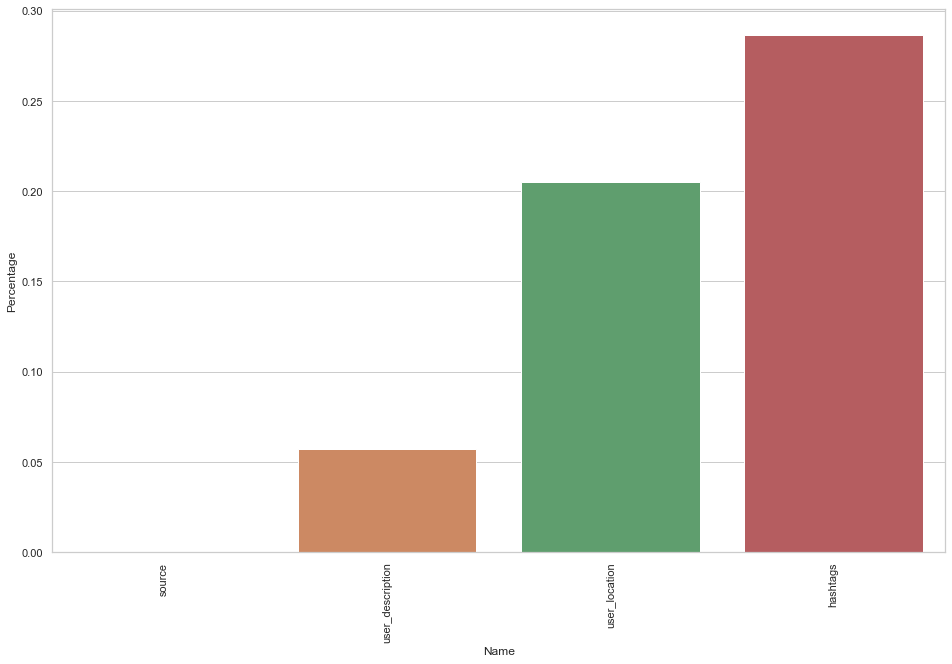

In [185]:
plot_missing_values(df)


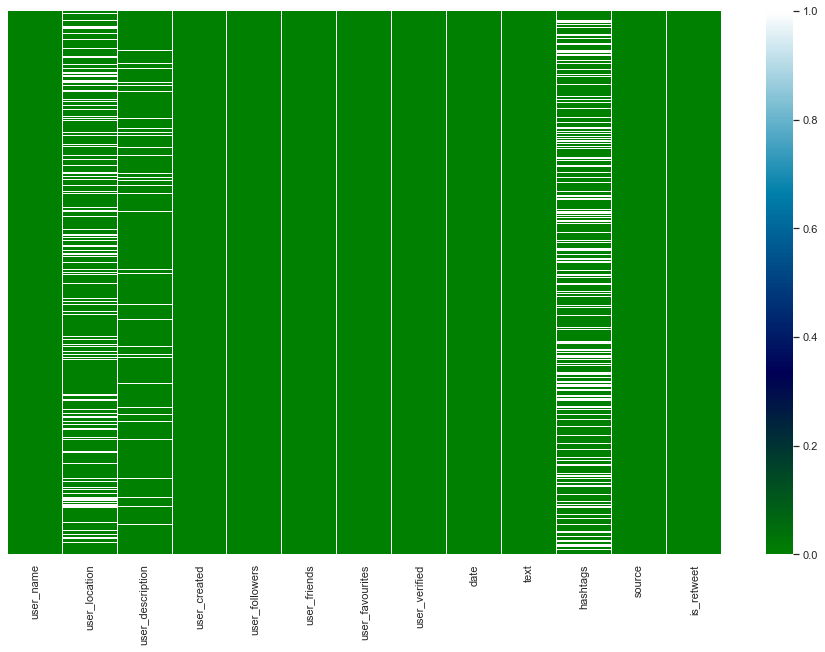

In [186]:
# heatmap representation of missing values
# plasma,visdir

sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='ocean')

## 2.3 Plot unique values.


In [187]:
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [188]:
udf = return_unique_values(df)
print(udf)

            Features  Uniques
0   user_name         92276  
1   user_location     26920  
2   user_description  89200  
3   user_created      93708  
4   user_followers    27694  
5   user_friends      11022  
6   user_favourites   35259  
7   user_verified     2      
8   date              136611 
9   text              178683 
10  hashtags          52640  
11  source            610    
12  is_retweet        1      


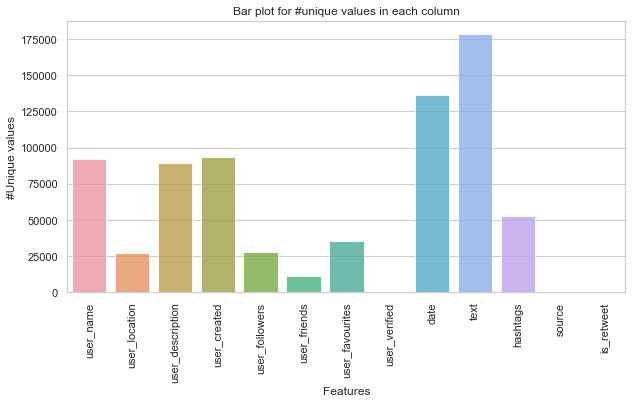

In [189]:
f, ax = plt.subplots(1,1, figsize=(10,5))#plt.figure(figsize=(10, 5))

sns.barplot(x=udf['Features'], y=udf['Uniques'], alpha=0.8)
plt.title('Bar plot for #unique values in each column')
plt.ylabel('#Unique values', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

## 2.4 Frequency of  tweeting about Corona(users,location, source and day/date)

In [190]:
def plot_frequency_charts(df, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting about Corona'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()
    

### 2.4.1 Frequency of locations tweeting about Corona¶

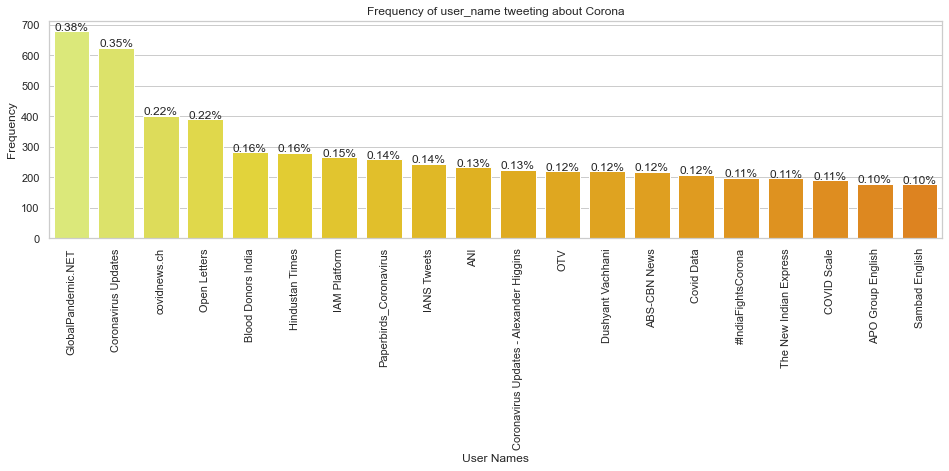

In [191]:
plot_frequency_charts(df, 'user_name', 'User Names','Wistia')


### 2.4.2 Frequency of locations tweeting about Corona

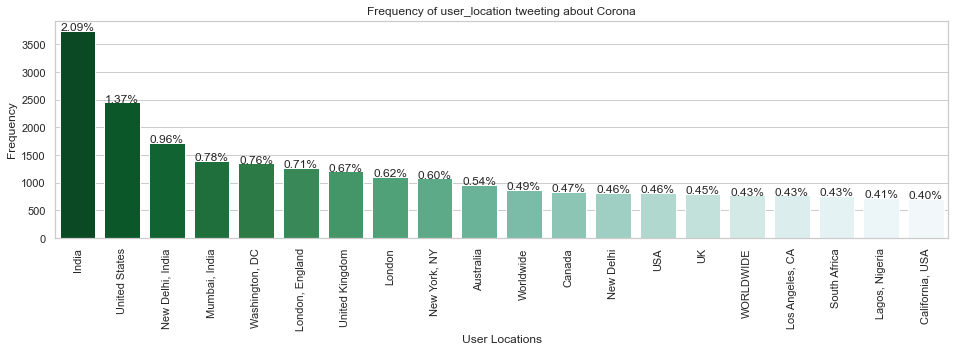

In [192]:
plot_frequency_charts(df, 'user_location', 'User Locations', 'BuGn_r')


### 2.4.3 Frequency of sources tweeting about Corona


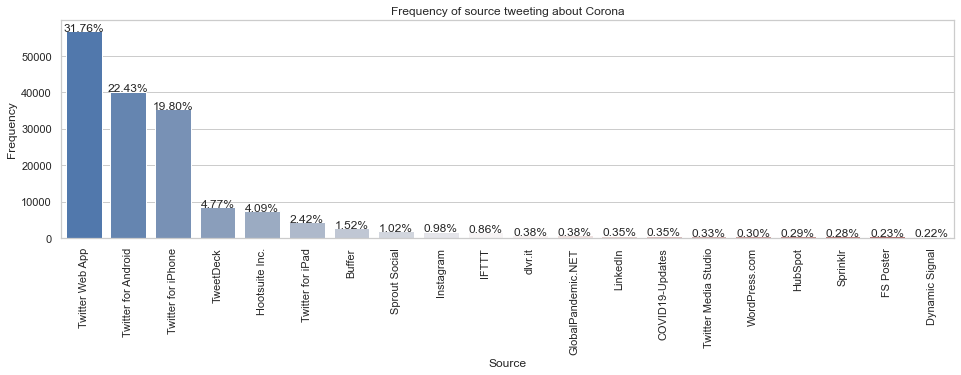

In [193]:
plot_frequency_charts(df, 'source','Source', 'vlag')


### 2.4.4 Frequency of day/date tweeting about Corona

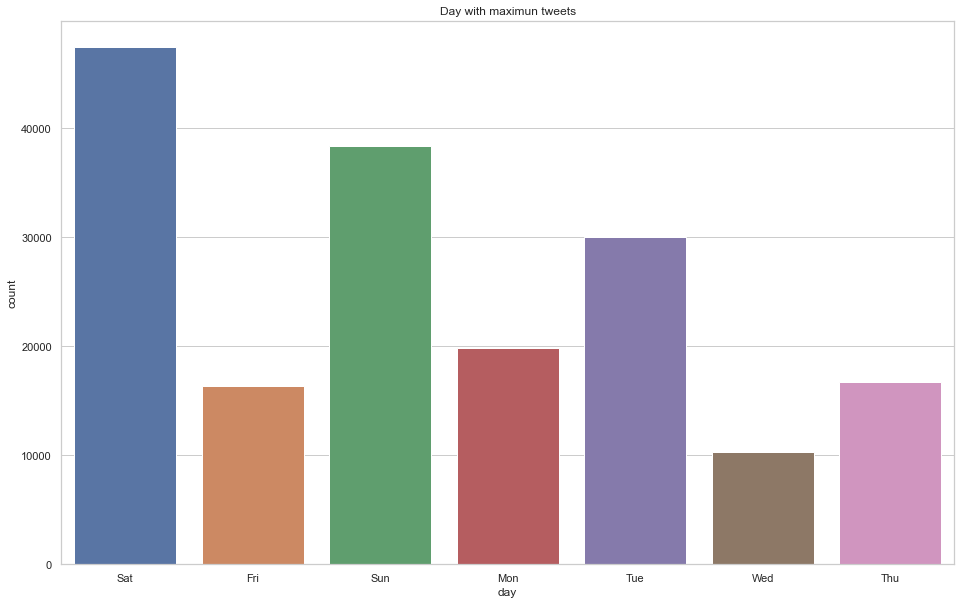

In [194]:
df["date"] = pd.to_datetime(df["date"])
df["Month"] = df["date"].apply(lambda x : x.month)
df["day"] = df["date"].apply(lambda x : x.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df["day"] = df["day"].map(dmap)
plt.title("Day with maximun tweets")
sns.countplot(df["day"])

Number of tweets according to Dates

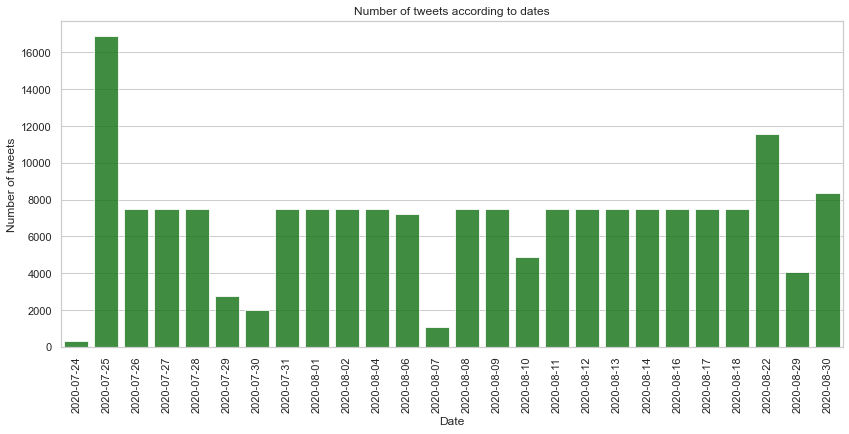

In [195]:
## Number of tweets according to Dates¶
df['date'] =  pd.to_datetime(df['date'])
cnt_srs = df['date'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.title("Number of tweets according to dates")

plt.show()

## 2.5 Characters and words number in tweets

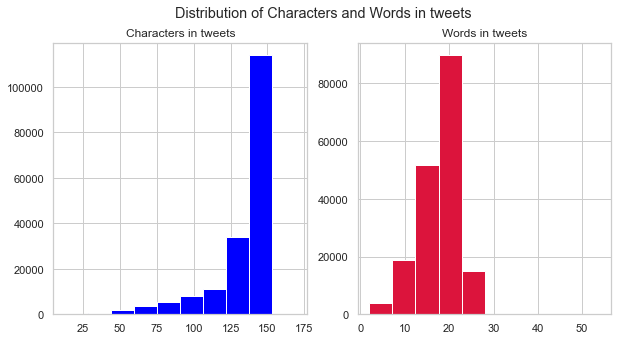

In [196]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=df['text'].str.len()
ax1.hist(tweet_len,color='blue')
ax1.set_title('Characters in tweets')
tweet_len=df['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='CRIMSON')
ax2.set_title('Words in tweets')
fig.suptitle('Distribution of Characters and Words in tweets')
plt.show()

100 to 120 characters in a tweet are most common .

10 to 20 words in a tweet are most common .

# 3.Tweets Preprocessing and Cleaning


## 3.1 Keep needed columns and rows

In [197]:
needed_columns=['date','user_location','text']
df=df[['date','user_location','text']]


In [198]:
df=df.loc[df['text'].str.contains('COVID vax|corona vax|covid-19 vax|covid19 vax|coronavirus vax|J&J|Johnson & Johnson|covaxin|sinovac|sinopharm|sputnik v|oxford|astrazeneca|moderna|anti-vax|antivax|pfizer|biontech|inject|injection|jab|vaccine|vaccina|vaccines|vaccinum|immunity|vaccination|vaccinated|injection|immunizations|immunization|immunisation',case=False)]
df = df.reset_index(drop = True)
df


,date,user_location,text
0,2020-07-25 12:23:41,"Mumbai, India",Punjab Govt Warns People Not to Click on Any URL Circulated via SMS/WhatsApp Claiming COVID-19 Relief Package of Rs… https://t.co/tOVrae0N2V
1,2020-07-25 12:22:02,"Washington, D.C.","“Until the day we have a medical vaccine, food is the best vaccine against chaos.” - @WFPChief David Beasley. \n\nAm… https://t.co/pEYhGxDRPN"
2,2020-07-25 12:21:46,"karnataka,bangalore ,india",PRANIK'S Giloy Capsules gives you far-reaching benefits to fight against the infections and boost your immunity.… https://t.co/JlZXHZT1A1
3,2020-07-25 12:20:37,NYC,Check out my latest article: Three Supply Chain Risks That Could Thwart A Successful COVID-19 Vaccine… https://t.co/3Tdkknwns7
4,2020-07-25 12:18:20,Liverpool | Yorkshire,"Even when we have a #COVID19 vaccine, are face coverings here to stay? It feels like a massive shift towards more a… https://t.co/K4K8BqVTZT"
...,...,...,...
5254,2020-08-29 19:52:41,"Washington, DC","A weakly effective vaccine could actually worsen #COVID19 if govt assumes lower risk, easing restrictions. Or if in… https://t.co/HlWOYaWab5"
5255,2020-08-29 19:50:26,🇪🇺 🇪🇬 🏳️‍🌈 🌍,@Paula77774444 @Simon_P_Hannah So elderly are dying of #COVID19 in care homes but a vaccine is unnecessary because… https://t.co/lbXX41fHdg
5256,2020-08-29 19:49:33,Montana USA,"Moderna and Pfizer’s COVID-19 vaccine candidates require ultra-low temperatures, raising questions about storage, d… https://t.co/vD6EGC9d3F"
5257,2020-08-29 19:47:15,"Calgary,Alberta (but wanders)","If you think herd immunity is a good idea, please read this thread from someone who really explains epidemiology we… https://t.co/CJazl22ELF"


## 3.2 deal with missing value

In [199]:
df.apply(lambda x: sum(x.isnull())/len(x),axis= 0) #Missing proportion


date             0.000000
user_location    0.196045
text             0.000000
dtype: float64

In [200]:
#Delete rows with duplicate variables.  
df.drop_duplicates(subset=['text'],inplace=True)
# df.dropna(subset=['text'],inplace=True)
df = df.reset_index(drop = True)


In [201]:
# df.dropna(axis=0,how='any',inplace=True) #  Drop the rows where at least one element is missing same as df.dropna()
#(inplace=True: Keep the DataFrame with valid entries in the same variable)
# df.dropna(how='any',axis = 0) #只要有缺失，就删除这一行，等价于df.dropna()
# df

In [202]:
# Define in which columns to look for missing values.
df.dropna(subset=['text'],inplace=True)

## 3.3 Format the data

### 3.3.1  Format the date

In [203]:
# df.date=pd.to_datetime(df.date).dt.date
df['date']=pd.to_datetime(df['date'], errors='coerce', utc=True).dt.strftime('%Y-%m-%d')
df.head()



,date,user_location,text
0,2020-07-25,"Mumbai, India",Punjab Govt Warns People Not to Click on Any URL Circulated via SMS/WhatsApp Claiming COVID-19 Relief Package of Rs… https://t.co/tOVrae0N2V
1,2020-07-25,"Washington, D.C.","“Until the day we have a medical vaccine, food is the best vaccine against chaos.” - @WFPChief David Beasley. \n\nAm… https://t.co/pEYhGxDRPN"
2,2020-07-25,"karnataka,bangalore ,india",PRANIK'S Giloy Capsules gives you far-reaching benefits to fight against the infections and boost your immunity.… https://t.co/JlZXHZT1A1
3,2020-07-25,NYC,Check out my latest article: Three Supply Chain Risks That Could Thwart A Successful COVID-19 Vaccine… https://t.co/3Tdkknwns7
4,2020-07-25,Liverpool | Yorkshire,"Even when we have a #COVID19 vaccine, are face coverings here to stay? It feels like a massive shift towards more a… https://t.co/K4K8BqVTZT"


### 3.3.2  Fix the user_location

Maximum tweets were done by USA, UK and India. These 3 countries are leading the vaccination drive. 
This article by Times of India mentions that USA, UK, China, India and Russia are playing a crucial role in vaccine manufacturing and production. 
Since twitter is banned(blocked) in China and Russia.


In [204]:
cnt_by_loc = df.groupby('user_location')['text'].count().sort_values(ascending=False, inplace=False).to_frame()
cnt_by_loc.style.background_gradient(cmap='Reds')

,text
user_location,
India,217
"New Delhi, India",88
"Mumbai, India",65
United States,62
"Washington, DC",46
United Kingdom,43
"London, England",42
Australia,37
Global,35


In [205]:
US="United States|America|Washington|New York|NY|USA|California|Los Angeles|Atlanta|Chicago|Boston|Texas|San Francisco|Austin|Columbus|Florida|Seattle|Philadelphia|Houston"
df.loc[df['user_location'].str.contains(US, na=False,flags=re.IGNORECASE),'user_location']="USA"

India="India|Delhi|Mumbai|Chennai|Hyderabad|Bangalore|Punjab"
df.loc[df['user_location'].str.contains(India, na=False,flags=re.IGNORECASE),'user_location']="India"

UK="United Kingdom|England|London|UK|Watford|Yorkshire"
df.loc[df['user_location'].str.contains(UK, na=False,flags=re.IGNORECASE),'user_location']="UK"

Australia="Australia|Melbourne|Sydney|Canberra"
df.loc[df['user_location'].str.contains(Australia, na=False,flags=re.IGNORECASE),'user_location']="Australia"

Canada="Canada|Ontario|Toronto|Alberta|British Columbia|Vancouver"
df.loc[df['user_location'].str.contains(Canada, na=False,flags=re.IGNORECASE),'user_location']="Canada"

Worldwide="Worldwide|Global|Earth|World"
df.loc[df['user_location'].str.contains(Worldwide, na=False,flags=re.IGNORECASE),'user_location']="Worldwide"

Switzerland="Switzerland"
df.loc[df['user_location'].str.contains(Switzerland, na=False,flags=re.IGNORECASE),'user_location']="Switzerland"

Pakistan="Pakistan"
df.loc[df['user_location'].str.contains(Pakistan, na=False,flags=re.IGNORECASE),'user_location']="Pakistan"

Philippines="Philippines|Makati City"
df.loc[df['user_location'].str.contains(Philippines, na=False,flags=re.IGNORECASE),'user_location']="Philippines"

China="China|Beijing|Hong Kong|Taiwan"
df.loc[df['user_location'].str.contains(China, na=False,flags=re.IGNORECASE),'user_location']="China"

In [206]:
cnt_by_loc = df.groupby('user_location')['text'].count().sort_values(ascending=False, inplace=False).to_frame()
cnt_by_loc.style.background_gradient(cmap='Reds')


,text
user_location,
India,784
USA,760
UK,333
Worldwide,154
Australia,131
Canada,112
Pakistan,81
Philippines,75
China,60


## 3.4 Clean the data


### 3.4.1  Preprocessing text for Vader Sentiment ANALYSIS

1.Here I didn't touch punctuations and case for now as VADER SENTIMENT ANALYSIS SCORES are affected by factors like punctuations,capitalization,preceeding-trigrams,degree modifiers,conjunctions etc.

2.The Sentiments have been classified based on scores according to the VADER convention.

3.A new column 'Sentiment'is thus, added giving sentiment corresponding to each Tweet text. （https://www.kaggle.com/shreyasajal/pfizer-vaccine-tweets-vader-sentiment-analysis-eda）

(When writers insert or alter words in a direct quotation, square brackets—[ ]—are placed around the change. The brackets, always used in pairs, enclose words intended to clarify meaning, provide a brief explanation, or to help integrate the quote into the writer's sentence.)

text = re.sub(r'\s+', ' ', text, flags=re.I)

(Removing Multiple Spaces:Sometimes, multiple spaces appear between words as a result of removing words or punctuation. For instance, in the output of the last example, there are multiple spaces between in and year. These spaces can be removed using the \s pattern, which refers to a single space. )

https://stackabuse.com/using-regex-for-text-manipulation-in-python/

TML标签都是使用尖括号包起来的，因此使用<.*?>就可以匹配所有和

In [207]:
def clean(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
#     text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    return text

df['text_vader'] = df['text'].apply(lambda x:clean(x))
df

,date,user_location,text,text_vader
0,2020-07-25,India,Punjab Govt Warns People Not to Click on Any URL Circulated via SMS/WhatsApp Claiming COVID-19 Relief Package of Rs… https://t.co/tOVrae0N2V,Punjab Govt Warns People Not to Click on Any URL Circulated via SMS/WhatsApp Claiming COVID- Relief Package of Rs…
1,2020-07-25,USA,"“Until the day we have a medical vaccine, food is the best vaccine against chaos.” - @WFPChief David Beasley. \n\nAm… https://t.co/pEYhGxDRPN","“Until the day we have a medical vaccine, food is the best vaccine against chaos.” - @WFPChief David Beasley. Am…"
2,2020-07-25,India,PRANIK'S Giloy Capsules gives you far-reaching benefits to fight against the infections and boost your immunity.… https://t.co/JlZXHZT1A1,PRANIK'S Giloy Capsules gives you far-reaching benefits to fight against the infections and boost your immunity.…
3,2020-07-25,USA,Check out my latest article: Three Supply Chain Risks That Could Thwart A Successful COVID-19 Vaccine… https://t.co/3Tdkknwns7,Check out my latest article: Three Supply Chain Risks That Could Thwart A Successful COVID- Vaccine…
4,2020-07-25,UK,"Even when we have a #COVID19 vaccine, are face coverings here to stay? It feels like a massive shift towards more a… https://t.co/K4K8BqVTZT","Even when we have a # vaccine, are face coverings here to stay? It feels like a massive shift towards more a…"
...,...,...,...,...
5241,2020-08-29,USA,"A weakly effective vaccine could actually worsen #COVID19 if govt assumes lower risk, easing restrictions. Or if in… https://t.co/HlWOYaWab5","A weakly effective vaccine could actually worsen # if govt assumes lower risk, easing restrictions. Or if in…"
5242,2020-08-29,🇪🇺 🇪🇬 🏳️‍🌈 🌍,@Paula77774444 @Simon_P_Hannah So elderly are dying of #COVID19 in care homes but a vaccine is unnecessary because… https://t.co/lbXX41fHdg,@ @Simon_P_Hannah So elderly are dying of # in care homes but a vaccine is unnecessary because…
5243,2020-08-29,USA,"Moderna and Pfizer’s COVID-19 vaccine candidates require ultra-low temperatures, raising questions about storage, d… https://t.co/vD6EGC9d3F","Moderna and Pfizer’s COVID- vaccine candidates require ultra-low temperatures, raising questions about storage, d…"
5244,2020-08-29,Canada,"If you think herd immunity is a good idea, please read this thread from someone who really explains epidemiology we… https://t.co/CJazl22ELF","If you think herd immunity is a good idea, please read this thread from someone who really explains epidemiology we…"


### 3.4.2 Removing punctuations, making text lowercase and removing emoji

In [208]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    return text

df['clean_text'] = df['text_vader'].apply(lambda x: clean_text(x))


In [209]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['clean_text'] = df['clean_text'].apply(lambda x: remove_emoji(x))


#### 3.4.3 Tokenization (Splitting a sentence into words(tokes)) ，removing stopwords and words length less than 3

In [210]:
# from nltk.tokenize import word_tokenize

def tokenization(text):
    text = re.split('\W+', text)
    text = [x for x in text if x != ''and len(x) > 3 ] 
#     text = [x for x in text if len(x) > 3] 
    return text

df['tokenized'] = df['clean_text'].apply(lambda x: tokenization(x))
# df['tokenized'] = df['clean_text'].apply(lambda x: word_tokenize(x.lower()))



In [211]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

df['No_stopwords'] = df['tokenized'].apply(lambda x: remove_stopwords(x))



In [212]:
df

,date,user_location,text,text_vader,clean_text,tokenized,No_stopwords
0,2020-07-25,India,Punjab Govt Warns People Not to Click on Any URL Circulated via SMS/WhatsApp Claiming COVID-19 Relief Package of Rs… https://t.co/tOVrae0N2V,Punjab Govt Warns People Not to Click on Any URL Circulated via SMS/WhatsApp Claiming COVID- Relief Package of Rs…,punjab govt warns people not to click on any url circulated via smswhatsapp claiming covid relief package of rs…,"[punjab, govt, warns, people, click, circulated, smswhatsapp, claiming, covid, relief, package]","[punjab, govt, warns, people, click, circulated, smswhatsapp, claiming, covid, relief, package]"
1,2020-07-25,USA,"“Until the day we have a medical vaccine, food is the best vaccine against chaos.” - @WFPChief David Beasley. \n\nAm… https://t.co/pEYhGxDRPN","“Until the day we have a medical vaccine, food is the best vaccine against chaos.” - @WFPChief David Beasley. Am…",“until the day we have a medical vaccine food is the best vaccine against chaos” wfpchief david beasley am…,"[until, have, medical, vaccine, food, best, vaccine, against, chaos, wfpchief, david, beasley]","[medical, vaccine, food, best, vaccine, chaos, wfpchief, david, beasley]"
2,2020-07-25,India,PRANIK'S Giloy Capsules gives you far-reaching benefits to fight against the infections and boost your immunity.… https://t.co/JlZXHZT1A1,PRANIK'S Giloy Capsules gives you far-reaching benefits to fight against the infections and boost your immunity.…,praniks giloy capsules gives you farreaching benefits to fight against the infections and boost your immunity…,"[praniks, giloy, capsules, gives, farreaching, benefits, fight, against, infections, boost, your, immunity]","[praniks, giloy, capsules, gives, farreaching, benefits, fight, infections, boost, immunity]"
3,2020-07-25,USA,Check out my latest article: Three Supply Chain Risks That Could Thwart A Successful COVID-19 Vaccine… https://t.co/3Tdkknwns7,Check out my latest article: Three Supply Chain Risks That Could Thwart A Successful COVID- Vaccine…,check out my latest article three supply chain risks that could thwart a successful covid vaccine…,"[check, latest, article, three, supply, chain, risks, that, could, thwart, successful, covid, vaccine]","[check, latest, article, three, supply, chain, risks, could, thwart, successful, covid, vaccine]"
4,2020-07-25,UK,"Even when we have a #COVID19 vaccine, are face coverings here to stay? It feels like a massive shift towards more a… https://t.co/K4K8BqVTZT","Even when we have a # vaccine, are face coverings here to stay? It feels like a massive shift towards more a…",even when we have a vaccine are face coverings here to stay it feels like a massive shift towards more a…,"[even, when, have, vaccine, face, coverings, here, stay, feels, like, massive, shift, towards, more]","[even, vaccine, face, coverings, stay, feels, like, massive, shift, towards]"
...,...,...,...,...,...,...,...
5241,2020-08-29,USA,"A weakly effective vaccine could actually worsen #COVID19 if govt assumes lower risk, easing restrictions. Or if in… https://t.co/HlWOYaWab5","A weakly effective vaccine could actually worsen # if govt assumes lower risk, easing restrictions. Or if in…",a weakly effective vaccine could actually worsen if govt assumes lower risk easing restrictions or if in…,"[weakly, effective, vaccine, could, actually, worsen, govt, assumes, lower, risk, easing, restrictions]","[weakly, effective, vaccine, could, actually, worsen, govt, assumes, lower, risk, easing, restrictions]"
5242,2020-08-29,🇪🇺 🇪🇬 🏳️‍🌈 🌍,@Paula77774444 @Simon_P_Hannah So elderly are dying of #COVID19 in care homes but a vaccine is unnecessary because… https://t.co/lbXX41fHdg,@ @Simon_P_Hannah So elderly are dying of # in care homes but a vaccine is unnecessary because…,simonphannah so elderly are dying of in care homes but a vaccine is unnecessary because…,"[simonphannah, elderly, dying, care, homes, vaccine, unnecessary, because]","[simonphannah, elderly, dying, care, h

## 3.4 STEMMING AND LEMMATIZATION
df shows the text at each step of the preprocessing

From the dataframe df we can decide which one of the stemming(Porter or Snowball)/lemmatization or both is suitable for our data.


In [213]:
df2=pd.DataFrame()
df2['No_stopwords']=df['No_stopwords']

In [214]:
ps = PorterStemmer()
def stemming1(text):
    text = [ps.stem(word) for word in text]
    return text

df2['stemmed_porter'] = df2['No_stopwords'].apply(lambda x: stemming1(x))

In [215]:
s_stemmer = SnowballStemmer(language='english')
def stemming2(text):
    text = [s_stemmer.stem(word) for word in text]
    return text
df2['stemmed_snowball'] = df2['No_stopwords'].apply(lambda x: stemming2(x))


In [216]:
wn = WordNetLemmatizer()
def lemmatizer(text):
    text = [wn.lemmatize(word,pos='n') for word in text]
    text = [wn.lemmatize(word,pos='v') for word in text]
    text = [wn.lemmatize(word,pos='a') for word in text]
    text = [wn.lemmatize(word,pos='r') for word in text]
    return text


df2['lemmatized'] = df2['No_stopwords'].apply(lambda x: lemmatizer(x))
# df2['lemmatized1'] = df2['stemmed_porter'].apply(lambda x: lemmatizer(x))



In [217]:
# # nltk.download('averaged_perceptron_tagger')

# def nouns(text):
#     nouns = [word for (word, pos) in nltk.pos_tag(text) if(pos[:2] == 'NN')]
#     return nouns

# df2['noun'] = df2['lemmatized'].apply(lambda x: nouns(x))


IT LOOKS LIKE BOTH THE STEMMING METHODS ARE REDUCING THE TEXT WORDS TO UNUSUAL STEMS WHILE LEMMATIZATION SEEMS TO WORK FINE


In [310]:
df2

,No_stopwords,stemmed_porter,stemmed_snowball,lemmatized
0,"[punjab, govt, warns, people, click, circulated, smswhatsapp, claiming, covid, relief, package]","[punjab, govt, warn, peopl, click, circul, smswhatsapp, claim, covid, relief, packag]","[punjab, govt, warn, peopl, click, circul, smswhatsapp, claim, covid, relief, packag]","[punjab, govt, warn, people, click, circulate, smswhatsapp, claim, covid, relief, package]"
1,"[medical, vaccine, food, best, vaccine, chaos, wfpchief, david, beasley]","[medic, vaccin, food, best, vaccin, chao, wfpchief, david, beasley]","[medic, vaccin, food, best, vaccin, chao, wfpchief, david, beasley]","[medical, vaccine, food, best, vaccine, chaos, wfpchief, david, beasley]"
2,"[praniks, giloy, capsules, gives, farreaching, benefits, fight, infections, boost, immunity]","[pranik, giloy, capsul, give, farreach, benefit, fight, infect, boost, immun]","[pranik, giloy, capsul, give, farreach, benefit, fight, infect, boost, immun]","[praniks, giloy, capsule, give, farreaching, benefit, fight, infection, boost, immunity]"
3,"[check, latest, article, three, supply, chain, risks, could, thwart, successful, covid, vaccine]","[check, latest, articl, three, suppli, chain, risk, could, thwart, success, covid, vaccin]","[check, latest, articl, three, suppli, chain, risk, could, thwart, success, covid, vaccin]","[check, late, article, three, supply, chain, risk, could, thwart, successful, covid, vaccine]"
4,"[even, vaccine, face, coverings, stay, feels, like, massive, shift, towards]","[even, vaccin, face, cover, stay, feel, like, massiv, shift, toward]","[even, vaccin, face, cover, stay, feel, like, massiv, shift, toward]","[even, vaccine, face, cover, stay, feel, like, massive, shift, towards]"
...,...,...,...,...
5241,"[weakly, effective, vaccine, could, actually, worsen, govt, assumes, lower, risk, easing, restrictions]","[weakli, effect, vaccin, could, actual, worsen, govt, assum, lower, risk, eas, restrict]","[weak, effect, vaccin, could, actual, worsen, govt, assum, lower, risk, eas, restrict]","[weakly, effective, vaccine, could, actually, worsen, govt, assume, low, risk, ease, restriction]"
5242,"[simonphannah, elderly, dying, care, homes, vaccine, unnecessary]","[simonphannah, elderli, die, care, home, vaccin, unnecessari]","[simonphannah, elder, die, care, home, vaccin, unnecessari]","[simonphannah, elderly, die, care, home, vaccine, unnecessary]"
5243,"[moderna, pfizer, covid, vaccine, candidates, require, ultralow, temperatures, raising, questions, storage]","[moderna, pfizer, covid, vaccin, candid, requir, ultralow, temperatur, rais, question, storag]","[moderna, pfizer, covid, vaccin, candid, requir, ultralow, temperatur, rais, question, storag]","[moderna, pfizer, covid, vaccine, candidate, require, ultralow, temperature, raise, question, storage]"
5244,"[think, herd, immunity, good, idea, please, read, thread, someone, really, explains, epidemiology]","[think, herd, immun, good, idea, pleas, read, thread, someon, realli, explain, epidemiolog]","[think, herd, immun, good, idea, pleas, read, thread, someon, realli, explain, epidemiolog]","[think, herd, immunity, good, idea, please, read, thread, someone, really, explain, epidemiology]"


In [219]:
df['text2']=df2['lemmatized']

#####  Why is Lemmatization better than Stemming? 

Stemming algorithm works by cutting the suffix from the word. In a broader sense cuts either the beginning or end of the word.

On the contrary, Lemmatization is a more powerful operation, and it takes into consideration morphological analysis of the words.
It returns the lemma which is the base form of all its inflectional forms.
In-depth linguistic knowledge is required to create dictionaries and look for the proper form of the word.
Stemming is a general operation while lemmatization is an intelligent operation where the proper form will be looked in the dictionary. Hence, lemmatization helps in forming better machine learning features.</b></font> 
If you look stemming for studies and studying, output is same (studi) but lemmatizer provides different lemma for both tokens study for studies and studying for studying. 
So when we need to make feature set to train machine, it would be great if lemmatization is preferred.


# 4. Sentiment Analysis

##  4.1 VADER
(Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.

DESCRIPTION: Empirically validated by multiple independent human judges, VADER incorporates a "gold-standard" sentiment lexicon that is especially attuned to microblog-like contexts.

The VADER sentiment lexicon is sensitive both the polarity and the intensity of sentiments expressed in social media contexts, and is also generally applicable to sentiment analysis in other domains.


In [220]:
#VADER’s SentimentIntensityAnalyzer() takes in a string and returns a dictionary of scores in each of four categories:
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# from nltk.sentiment.util import *
# nltk.download('stopwords')
# nltk.download('vader_lexicon')

In [307]:
# analyser = SentimentIntensityAnalyzer()
# score = analyser.polarity_scores('CovidVaccine trials going well so far. ')
# score

{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.2732}

In [309]:
# sentiment=[]
# if score['compound']>=0.05:
#     sentiment.append('Positive')
# elif score['compound']<=(-0.05):
#     sentiment.append('Negative')
# else:
#     sentiment.append('Neutral')
# sentiment

['Positive']

In [222]:
analyser = SentimentIntensityAnalyzer()
scores=[]
for i in range(len(df['text_vader'])):
    
    score = analyser.polarity_scores(df['text_vader'][i])
    score=score['compound']
    scores.append(score)

### 4.1.1 Standardized thresholds for classifying
The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. Typical threshold values (used in the literature cited on this page) are:

positive sentiment: compound score >= 0.05
neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
negative sentiment: compound score <= -0.05

In [223]:
sentiment=[]
for i in scores:
    if i>=0.05:
        sentiment.append('Positive')
    elif i<=(-0.05):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df['label']=pd.Series(np.array(sentiment))


In [224]:
df.head()


,date,user_location,text,text_vader,clean_text,tokenized,No_stopwords,text2,label
0,2020-07-25,India,Punjab Govt Warns People Not to Click on Any URL Circulated via SMS/WhatsApp Claiming COVID-19 Relief Package of Rs… https://t.co/tOVrae0N2V,Punjab Govt Warns People Not to Click on Any URL Circulated via SMS/WhatsApp Claiming COVID- Relief Package of Rs…,punjab govt warns people not to click on any url circulated via smswhatsapp claiming covid relief package of rs…,"[punjab, govt, warns, people, click, circulated, smswhatsapp, claiming, covid, relief, package]","[punjab, govt, warns, people, click, circulated, smswhatsapp, claiming, covid, relief, package]","[punjab, govt, warn, people, click, circulate, smswhatsapp, claim, covid, relief, package]",Positive
1,2020-07-25,USA,"“Until the day we have a medical vaccine, food is the best vaccine against chaos.” - @WFPChief David Beasley. \n\nAm… https://t.co/pEYhGxDRPN","“Until the day we have a medical vaccine, food is the best vaccine against chaos.” - @WFPChief David Beasley. Am…",“until the day we have a medical vaccine food is the best vaccine against chaos” wfpchief david beasley am…,"[until, have, medical, vaccine, food, best, vaccine, against, chaos, wfpchief, david, beasley]","[medical, vaccine, food, best, vaccine, chaos, wfpchief, david, beasley]","[medical, vaccine, food, best, vaccine, chaos, wfpchief, david, beasley]",Positive
2,2020-07-25,India,PRANIK'S Giloy Capsules gives you far-reaching benefits to fight against the infections and boost your immunity.… https://t.co/JlZXHZT1A1,PRANIK'S Giloy Capsules gives you far-reaching benefits to fight against the infections and boost your immunity.…,praniks giloy capsules gives you farreaching benefits to fight against the infections and boost your immunity…,"[praniks, giloy, capsules, gives, farreaching, benefits, fight, against, infections, boost, your, immunity]","[praniks, giloy, capsules, gives, farreaching, benefits, fight, infections, boost, immunity]","[praniks, giloy, capsule, give, farreaching, benefit, fight, infection, boost, immunity]",Positive
3,2020-07-25,USA,Check out my latest article: Three Supply Chain Risks That Could Thwart A Successful COVID-19 Vaccine… https://t.co/3Tdkknwns7,Check out my latest article: Three Supply Chain Risks That Could Thwart A Successful COVID- Vaccine…,check out my latest article three supply chain risks that could thwart a successful covid vaccine…,"[check, latest, article, three, supply, chain, risks, that, could, thwart, successful, covid, vaccine]","[check, latest, article, three, supply, chain, risks, could, thwart, successful, covid, vaccine]","[check, late, article, three, supply, chain, risk, could, thwart, successful, covid, vaccine]",Positive
4,2020-07-25,UK,"Even when we have a #COVID19 vaccine, are face coverings here to stay? It feels like a massive shift towards more a… https://t.co/K4K8BqVTZT","Even when we have a # vaccine, are face coverings here to stay? It feels like a massive shift towards more a…",even when we have a vaccine are face coverings here to stay it feels like a massive shift towards more a…,"[even, when, have, vaccine, face, coverings, here, stay, feels, like, massive, shift, towards, more]","[even, vaccine, face, coverings, stay, feels, like, massive, shift, towards]","[even, vaccine, face, cover, stay, feel, like, massive, shift, towards]",Positive


### 4.1.2 Plotting the sentiment score counts


In [225]:
counts_df=df.label.value_counts().reset_index()
display(counts_df)



,index,label
0,Neutral,2352
1,Positive,1982
2,Negative,912


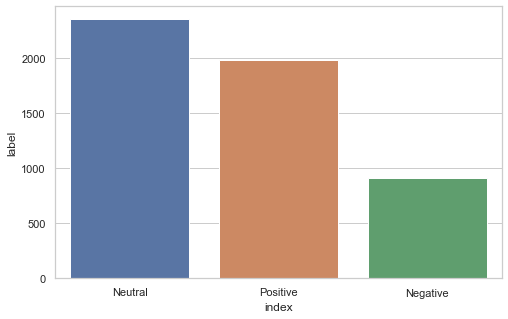

In [226]:
plt.figure(figsize=(8,5)) 
sns.barplot(x='index',y='label',data=counts_df)

### 4.2  Group number of counts by
date
positive,neutral,negative


In [227]:
df_date=df[['date','label','text2']]
df_date=df_date.groupby(['date','label'])
df_date=df_date.count()
df_date.head()


text2
date       label          
2020-07-24 Negative  3    
           Neutral   4    
           Positive  2    
2020-07-25 Negative  72   
           Neutral   166

In [228]:
df_date=df_date.reset_index()
df_date.columns=['date','label','counts']
df_date.head()


,date,label,counts
0,2020-07-24,Negative,3
1,2020-07-24,Neutral,4
2,2020-07-24,Positive,2
3,2020-07-25,Negative,72
4,2020-07-25,Neutral,166


In [229]:
# pip install plotly

import plotly.express as px
px.line(df_date,x='date',y='counts',color='label',
       title='Daily Tweet Sentimental Analysis')


In [230]:
loc_df1 = df.loc[df.date=="2020-08-11"]
loc_df1.text

2381    Russia first to announce a COVID-19 vaccine \n\n#CoronaVirusUpdate #COVID19 https://t.co/iJZmXAb7Tg                                               
2382    A rushed #COVID19 vaccine is worse than no COVID19 vaccine                                                                                        
2383    #BREAKING: Russian-produced #Covid19 vaccine receives regulatory approval – President Vladimir Putin https://t.co/1iN4j8PqW5                      
2384    #GlobalChangemaker: Thank you for giving free new #COVID19 #vaccines to my Motherland #Philippines, @Putin_eng. I s… https://t.co/fh1ngAQwPC      
2385    Navigating a pandemic @greentempleton @UniofOxford \n#covid19 #greentempleton #oxford https://t.co/ozJPhQZrK6                                     
                                                            ...                                                                                           
3129    The utter failure of the Dutch @rivm @MinPres @hugodejonge &am

In [231]:
# word_list=['lolz']
# # # word_list=['health','phase','trial']
# # # word_list=['herd','race','sweden']
# # # word_list=['update','herdimmunity','research']
# # # word_list=['punjab','case','given']
# # # word_list=['take','herd','mrna']
# # # word_list=['first','announced','approval']
# # # word_list=['deal','developed','candidate']
# # # word_list=['world','virus','claim']


# def contains_word(words):
#     return all(x in words  for x in word_list)

# is_related = df['text_vader'].apply(contains_word)

# loc_df2 = df[is_related]  # Filter using boolean series

# loc_df2




##### News
Russian President Vladimir Putin said Tuesday that Russia has developed the first approved vaccine against COVID-19, according to reports by local news agencies. Putin said his daughter was among the people who had been vaccinated with it. 

### 4.3 Wordcloud

In [232]:

def draw_word_cloud(df, label, title):
    loc_df = df.loc[df.label==label]
#     loc_df.loc[:, 'text'] = loc_df['text'].apply(punctuation_stopwords_removal)
    stopwords = set(STOPWORDS)
    stopwords.update(['vaccine',"vaccination"])

    word_cloud = WordCloud(
                    background_color='white',
                    stopwords=stopwords,
                     max_words=20,
                    max_font_size=50,
                    scale=5,
                    random_state=1).generate(str(loc_df['text2']))
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(word_cloud)
    plt.show()

In [233]:
from wordcloud import WordCloud, STOPWORDS

def draw_word_cloud_location(df, user_location, title):
    loc_df = df.loc[df.user_location==user_location]
#     loc_df.loc[:, 'text'] = loc_df['text'].apply(punctuation_stopwords_removal)
    stopwords = set(STOPWORDS)
    stopwords.update(['vaccine','vaccination'])

    word_cloud = WordCloud(
                    background_color='white',
                    stopwords=stopwords,
                    max_words=20,
                    max_font_size=50,
                    scale=5,
                    random_state=1).generate(str(loc_df['text2']))
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(word_cloud)
    plt.show()

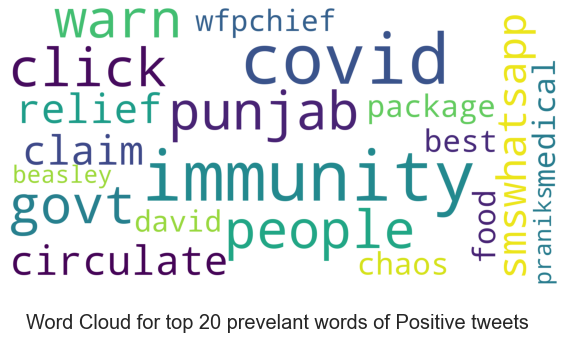

In [234]:
draw_word_cloud(df, 'Positive', 'Word Cloud for top 20 prevelant words of Positive tweets')


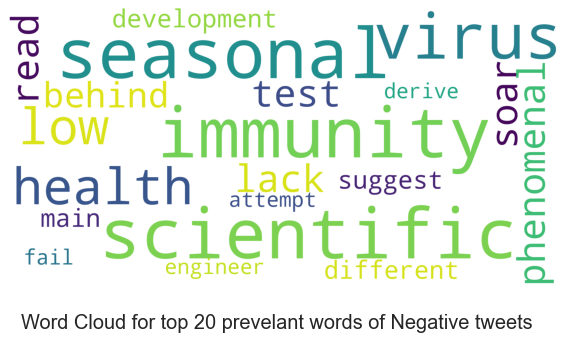

In [235]:
draw_word_cloud(df, 'Negative', 'Word Cloud for top 20 prevelant words of Negative tweets')


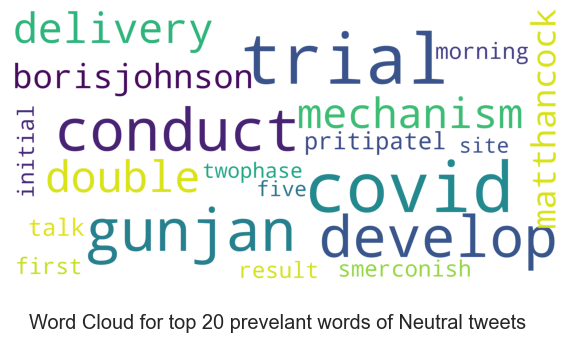

In [236]:
draw_word_cloud(df, 'Neutral', 'Word Cloud for top 20 prevelant words of Neutral tweets')


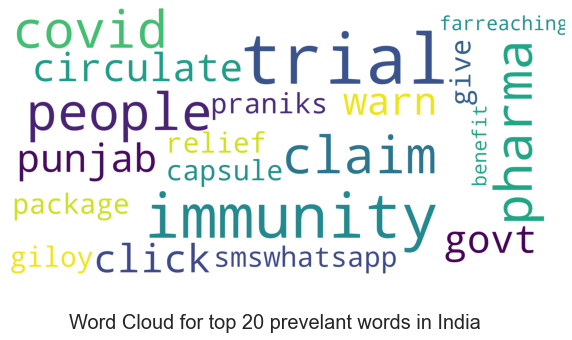

In [237]:
draw_word_cloud_location(df,"India",'Word Cloud for top 20 prevelant words in India ')
# （Rajasthan is a state located in northern India.）

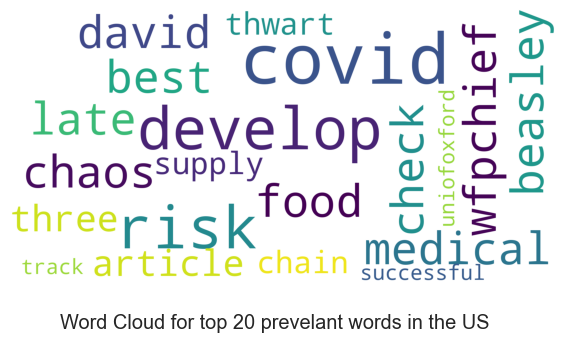

In [238]:
draw_word_cloud_location(df,"USA",'Word Cloud for top 20 prevelant words in the US ')
# The New York Yankees are an American professional baseball team based in the New York City borough of the Bronx. The Yankees compete in Major League Baseball as a member club of the American League East division. Wikipedia
# The Federal Emergency Management Agency (FEMA) is an agency of the United States Department of Homeland Security (DHS)
#Major League Baseball is an American professional baseball organization and the oldest of the major professional sports leagues in the United States and Canada. 

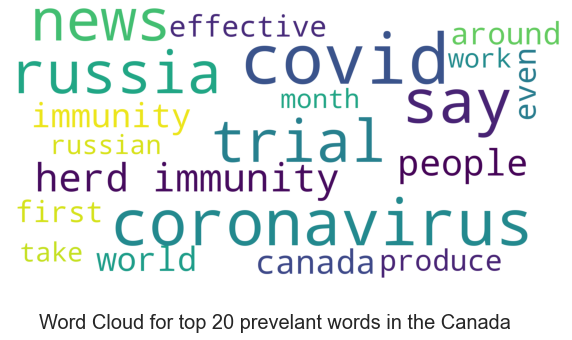

In [239]:
draw_word_cloud_location(df,"Canada",'Word Cloud for top 20 prevelant words in the Canada ')


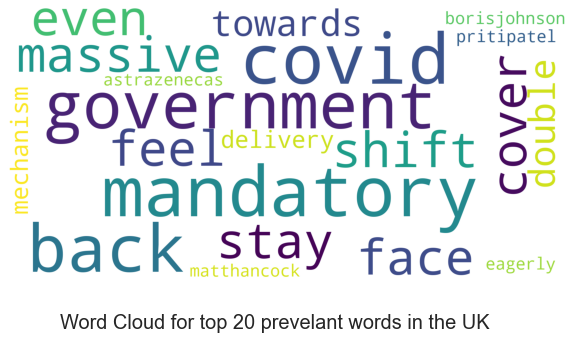

In [240]:
draw_word_cloud_location(df,"UK",'Word Cloud for top 20 prevelant words in the UK ')
# fiasco:a complete failure, especially a ludicrous or humiliating one.
# Mirren: British actor 

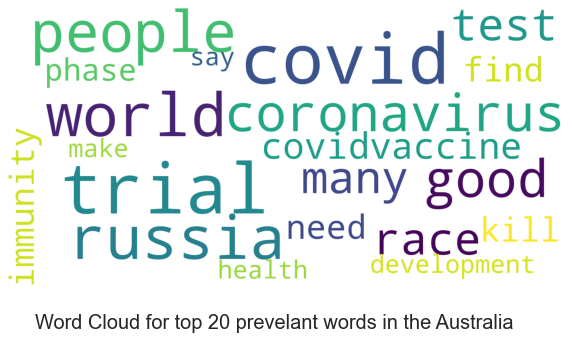

In [241]:
draw_word_cloud_location(df,"Australia",'Word Cloud for top 20 prevelant words in the Australia ')


# 5. Samilarity Analysis

## 5.1 Counting common words

### 5.1.1 Remove collection words

In additional to removing stopwords, it is common to also remove collection words.  These terms will be found in each tweet. This could skew our word frequency analysis.


In [242]:
# 'COVID vax|corona vax|covid-19 vax|covid19 vax|coronavirus vax|J&J|Johnson & Johnson|covaxin|sinovac|sinopharm|sputnik v|oxford|astrazeneca|moderna|anti-vax|antivax|pfizer|biontech|inject|injection|jab|vaccine|vaccina|vaccines|vaccinum|immunity|vaccination|vaccinated|injection|immunizations|immunization|immunisation'

collection_words = ['COVID vax','corona vax','covid-19 vax','covid19 vax','coronavirus vax','J&J','Johnson & Johnson','covaxin','sinovac','sinopharm','sputnik v','oxford','astrazeneca','moderna','anti-vax','antivax','pfizer','biontech','inject','injection','jab','vaccine','vaccina','vaccines','vaccinum','immunity','vaccination','vaccinated','injection','immunizations','immunization','immunisation']
df['text2'] = [[w for w in word if not w in collection_words]
                 for word in df['text2']]
df['text2']

0       [punjab, govt, warn, people, click, circulate, smswhatsapp, claim, covid, relief, package]
1       [medical, food, best, chaos, wfpchief, david, beasley]                                    
2       [praniks, giloy, capsule, give, farreaching, benefit, fight, infection, boost]            
3       [check, late, article, three, supply, chain, risk, could, thwart, successful, covid]      
4       [even, face, cover, stay, feel, like, massive, shift, towards]                            
                                     ...                                                          
5241    [weakly, effective, could, actually, worsen, govt, assume, low, risk, ease, restriction]  
5242    [simonphannah, elderly, die, care, home, unnecessary]                                     
5243    [covid, candidate, require, ultralow, temperature, raise, question, storage]              
5244    [think, herd, good, idea, please, read, thread, someone, really, explain, epidemiology]   
5245    [h

### 5.1.2 Counting common words of different countries
Maximum tweets were done by India, USA, UK, Canada and Australia.


In [243]:

top = Counter([item for sublist in df['text2'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
# temp.dropna(how='any',axis = 0) #h只要有缺失，就删除这一行，等价于df.dropna()
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,russia,769
1,coronavirus,678
2,covid,655
3,first,596
4,trial,471
5,say,389
6,putin,385
7,world,333
8,develop,288
9,russian,228


In [244]:
def common_words_country(df, country):    
    loc_df=df.loc[df.user_location==country,'text2']
    top = Counter([item for sublist in loc_df for item in sublist])
    temp= pd.DataFrame(top.most_common(20))
    temp.columns = ['Common_words','count']
    temp.style.background_gradient(cmap='Blues')
    return  temp


In [245]:
Location_list=["India", "USA", "UK", "Canada", "Australia"]

In [246]:
# import ipywidgets as widgets
# from ipywidgets import interact,fixed, interact_manual,interactive
# from __future__ import print_function
# import IPython.display


In [247]:
@interact
def country_common_words(Location=Location_list):   
    display(common_words_country(df, Location))    

    

interactive(children=(Dropdown(description='Location', options=('India', 'USA', 'UK', 'Canada', 'Australia'), …

## 5.2 Jaccard Similarity 

At the beginning, I want to consider influence of the number of each words.However,the number of words per word is bound to vary from country to country due to the number of people or users. 
So it would be better to discard the number of words and just consider the 20 words most frequently used in each country to get an overall feeling about vaccines between countries.


In [248]:
def jaccard_similarity(words1, words2):
    
    list1=words1.Common_words.tolist()
    list2=words2.Common_words.tolist()
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(set(list1)) + len(set(list2))) - intersection
    return float(intersection) / union


The Jaccard Similarity score is in a range of 0 to 1. 

If the two documents are identical, Jaccard Similarity is 1. 
The Jaccard similarity score is 0 if there are no common words between two documents.

Jaccard Similarity is the ratio of common words to total unique words or we can say the intersection of words to the union of words in both e documents. it scores range between 0–1. 1 represents the higher similarity while 0 represents the no similarity. Let’s see the formula of Jaccard similarity:
(https://machinelearninggeek.com/text-similarity-measures/)

In [249]:
##### For Tolerance
def similarity_degree(data,Location1,Location2):
    list1=common_words_country(data, Location1)
    list2=common_words_country(data, Location2)   
    score=jaccard_similarity(list1,list2) 
    if score==0:
        degree="Not similar"
    elif score==1:
        degree="Identical"
    elif 1>score>=0.3:
        degree="Higher similarity"
    else:
        degree="Lower similarity"
    return display("Similarity score:"+str(score),"Similarity degree:"+degree)

In [250]:
@interact
def similarity(Location1=Location_list,Location2=Location_list ):   
    similarity_degree(df,Location1,Location2)
    list1=common_words_country(df,Location1).Common_words.tolist()
    list2=common_words_country(df,Location2).Common_words.tolist()
    intersection= pd.DataFrame((set(list1).intersection(list2)))
    display(intersection)


interactive(children=(Dropdown(description='Location1', options=('India', 'USA', 'UK', 'Canada', 'Australia'),…

# 6. Topic modeling 

is a type of statistical modeling for discovering the abstract “topics” that occur in a collection of documents.
Latent Dirichlet Allocation (LDA) is an example of topic model and is used to classify text in a document to a particular topic.
It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.
Here we are going to apply LDA to the tweets and split them into topics.

## 6.1 Import necessary libraries

In [251]:

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 150)
import os
import gc
gc.enable()
import time
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import warnings
warnings.filterwarnings('ignore')
import urllib        

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast


from sklearn.feature_extraction.text import CountVectorizer
import scipy.stats as stats

import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

import seaborn as sns #for making plots
import matplotlib.pyplot as plt # for plotting
import os  # for os commands

import gensim
from gensim import corpora, models, similarities
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis.gensim


import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE


from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [252]:
def join(text):
    text = " ".join([x for x in text])  
    return text

# df['text'] = df['text'].apply(lambda x: join(x))

reindexed_data = df['text2'].apply(lambda x: join(x))


## 6.2 Latent Dirichilet Allocation (LDA)


#### Preprocessing
The only preprocessing step required in our case is feature construction,
where we take the sample of text headlines and represent them in some tractable feature space.

In practice, this simply means converting each string to a numerical vector. 
This can be done using the CountVectorizer object from SKLearn, which yields an  n×K  document-term matrix where  K  is the number of distinct words across the  n  headlines in our sample (less stop words and with a limit of max_features).

#### Converting each string to a numerical vector.

In [253]:

small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)

print('Tweets before vectorization: {}'.format(reindexed_data[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(reindexed_data)

print('Tweets after vectorization: \n{}'.format(small_document_term_matrix[123]))


Tweets before vectorization: punjab record recovery past hoursarynews
Tweets after vectorization: 
  (0, 5386)	1
  (0, 5577)	1
  (0, 5574)	1
  (0, 4916)	1
  (0, 3167)	1


Thus we have our (very high-rank and sparse) training data, small_document_term_matrix, and can now actually implement a clustering algorithm.
take our document-term matrix as input and yield an n×N topic matrix as output, where N is the number of topic categories (which we supply as a parameter). For the moment, we shall take this to be 5 like categories number.


In [254]:
n_topics = 5

In [255]:
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

In [256]:
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [257]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [258]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [259]:
top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  trial coronavirus phase covid clinical news begin volunteer india russia
Topic 2:  trial covid need people make good year coronavirus know human
Topic 3:  coronavirus covid punjab case russia country mask world report register
Topic 4:  russia putin say world coronavirus covid develop president russian daughter
Topic 5:  coronavirus covid herd effective say russia safe develop health think


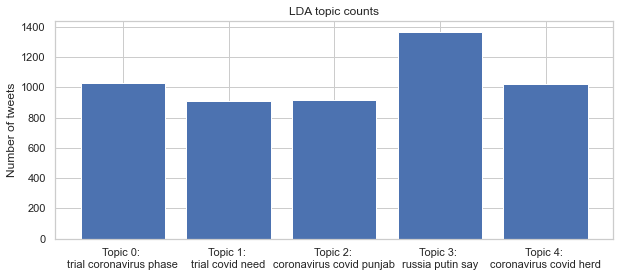

In [260]:
top_3_words = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(10,4))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of tweets');

In [261]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5246 samples in 0.026s...
[t-SNE] Computed neighbors for 5246 samples in 0.344s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5246
[t-SNE] Computed conditional probabilities for sample 2000 / 5246
[t-SNE] Computed conditional probabilities for sample 3000 / 5246
[t-SNE] Computed conditional probabilities for sample 4000 / 5246
[t-SNE] Computed conditional probabilities for sample 5000 / 5246
[t-SNE] Computed conditional probabilities for sample 5246 / 5246
[t-SNE] Mean sigma: 0.002901
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.790001
[t-SNE] KL divergence after 2000 iterations: 0.658627


In [262]:
# Define helper functions
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [263]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [264]:
top_3_words_lda = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=600, plot_height=600)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

## 6.3 LDA with the help of Gensim.


In [265]:
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

Folder "D:\Temp" will be used to save temporary dictionary and corpus.


In [266]:
list1 = ['coronavirus','covid','coronavirusvaccine','covidvaccine','russian','russia','putin','russianvaccine']

df['text2'] = [[w for w in word if not w in list1] for word in df['text2']]

texts=[]
texts = df['text2'].to_list()
texts[:5]

[['punjab',
  'govt',
  'warn',
  'people',
  'click',
  'circulate',
  'smswhatsapp',
  'claim',
  'relief',
  'package'],
 ['medical', 'food', 'best', 'chaos', 'wfpchief', 'david', 'beasley'],
 ['praniks',
  'giloy',
  'capsule',
  'give',
  'farreaching',
  'benefit',
  'fight',
  'infection',
  'boost'],
 ['check',
  'late',
  'article',
  'three',
  'supply',
  'chain',
  'risk',
  'could',
  'thwart',
  'successful'],
 ['even',
  'face',
  'cover',
  'stay',
  'feel',
  'like',
  'massive',
  'shift',
  'towards']]

In [267]:
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

Folder "D:\Temp" will be used to save temporary dictionary and corpus.


In [268]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [269]:
dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'tweets.dict'))  # store the dictionary  for future reference


2021-10-25 16:32:48,295 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-10-25 16:32:48,475 : INFO : built Dictionary(7874 unique tokens: ['circulate', 'claim', 'click', 'govt', 'package']...) from 5246 documents (total 36310 corpus positions)
2021-10-25 16:32:48,477 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(7874 unique tokens: ['circulate', 'claim', 'click', 'govt', 'package']...) from 5246 documents (total 36310 corpus positions)", 'datetime': '2021-10-25T16:32:48.476407', 'gensim': '4.0.1', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}
2021-10-25 16:32:48,478 : INFO : Dictionary lifecycle event {'fname_or_handle': 'D:\\Temp\\tweets.dict', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2021-10-25T16:32:48.478406', 'gensim': '4.0.1', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]', 'platfo

In [270]:
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=75000)# 删掉只在不超过10个文本中出现过的词，删掉在50%及以上的文本都出现了的词
# dictionary.filter_tokens(['一个'])  # 这个函数可以直接删除指定的词
dictionary.compactify()  # 去掉因删除词汇而出现的空白


2021-10-25 16:32:48,530 : INFO : discarding 7211 tokens: [('circulate', 4), ('click', 1), ('package', 2), ('relief', 4), ('smswhatsapp', 1), ('beasley', 1), ('chaos', 1), ('david', 3), ('wfpchief', 1), ('benefit', 6)]...
2021-10-25 16:32:48,532 : INFO : keeping 663 tokens which were in no less than 10 and no more than 2623 (=50.0%) documents
2021-10-25 16:32:48,544 : INFO : resulting dictionary: Dictionary(663 unique tokens: ['claim', 'govt', 'people', 'punjab', 'warn']...)


In [271]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'tweets.mm'), corpus) # store to disk, for later use


2021-10-25 16:32:48,642 : INFO : storing corpus in Matrix Market format to D:\Temp\tweets.mm
2021-10-25 16:32:48,646 : INFO : saving sparse matrix to D:\Temp\tweets.mm
2021-10-25 16:32:48,649 : INFO : PROGRESS: saving document #0
2021-10-25 16:32:48,665 : INFO : PROGRESS: saving document #1000
2021-10-25 16:32:48,685 : INFO : PROGRESS: saving document #2000
2021-10-25 16:32:48,713 : INFO : PROGRESS: saving document #3000
2021-10-25 16:32:48,742 : INFO : PROGRESS: saving document #4000
2021-10-25 16:32:48,770 : INFO : PROGRESS: saving document #5000
2021-10-25 16:32:48,780 : INFO : saved 5246x663 matrix, density=0.652% (22694/3478098)
2021-10-25 16:32:48,782 : INFO : saving MmCorpus index to D:\Temp\tweets.mm.index


In [272]:
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(5, 1), (6, 1), (7, 1)],
 [(8, 1), (9, 1), (10, 1), (11, 1)],
 [(12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1)],
 [(21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)],
 [(27, 1), (28, 1), (29, 1), (30, 1), (31, 1)],
 [(32, 1), (33, 1), (34, 1)],
 [(35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1)],
 [(30, 1), (43, 1), (44, 1), (45, 1)],
 [(15, 1)],
 [(46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1)],
 [(52, 1), (53, 1)],
 [(36, 1), (40, 2), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1)],
 [(51, 1), (59, 1), (60, 1), (61, 1), (62, 1)],
 [(63, 1), (64, 1)],
 [(35, 1), (38, 1), (39, 1), (40, 1), (54, 1), (65, 1), (66, 1), (67, 1)],
 [(68, 1), (69, 1)],
 [(70, 1), (71, 1), (72, 1)],
 [(56, 1), (57, 1), (73, 1), (74, 1), (75, 1), (76, 1)],
 [(44, 1)],
 [(77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 2)],
 [(0, 1), (42, 1), (83, 1), (84, 1)],
 [(85, 1), (86, 1), (87, 1), 

##  To continue, lets use that corpus, with the help of Gensim.
Gensim is an open-source library for unsupervised topic modeling and natural language processing,
using modern statistical machine learning. Gensim is implemented in Python and Cython. Wikipedia¶


### Creating a transformation
The transformations are standard Python objects, typically initialized by means of a training corpus:
Different transformations may require different initialization parameters; in case of TfIdf, the “training” consists simply of going through the supplied corpus once and computing document frequencies of all its features.

In [273]:
tfidf = gensim.models.TfidfModel(corpus) # step 1 -- initialize a model


2021-10-25 16:32:49,305 : INFO : collecting document frequencies
2021-10-25 16:32:49,306 : INFO : PROGRESS: processing document #0
2021-10-25 16:32:49,322 : INFO : TfidfModel lifecycle event {'msg': 'calculated IDF weights for 5246 documents and 663 features (22694 matrix non-zeros)', 'datetime': '2021-10-25T16:32:49.322923', 'gensim': '4.0.1', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'initialize'}


In [274]:
corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors


## Topic number

perplexity 

Perplexity is a commonly used measurement in information theory to evaluate how well a statistical model describes a dataset
coherence

The concept of topic coherence combines a number of measures into a framework to evaluate the coherence between topics inferred by a model. 

In [275]:
#Metrics for Topic Models
start = 2
limit = 22
step = 1

coherence_vals = []
perplexity_vals = []

for n_topic in tqdm(range(start, limit, step)):

    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=n_topic, random_state=0)
    perplexity_vals.append(np.exp2(-lda_model.log_perplexity(corpus_tfidf)))
    coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_vals.append(coherence_model_lda.get_coherence())
    


  0%|                                                                                           | 0/20 [00:00<?, ?it/s]2021-10-25 16:32:49,394 : INFO : using symmetric alpha at 0.5
2021-10-25 16:32:49,396 : INFO : using symmetric eta at 0.5
2021-10-25 16:32:49,399 : INFO : using serial LDA version on this node
2021-10-25 16:32:49,403 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 5246 documents, updating model once every 2000 documents, evaluating perplexity every 5246 documents, iterating 50x with a convergence threshold of 0.001000
2021-10-25 16:32:49,405 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-10-25 16:32:49,502 : INFO : PROGRESS: pass 0, at document #2000/5246
2021-10-25 16:32:50,879 : INFO : merging changes from 2000 documents into a model of 5246 documents
2021-10-25 16:32:50,884 : INFO : topic #0 (0.500): 0.012*"trial" + 0.009*"wou

2021-10-25 16:33:18,078 : INFO : topic diff=0.748755, rho=0.707107
2021-10-25 16:33:18,798 : INFO : -7.621 per-word bound, 196.8 perplexity estimate based on a held-out corpus of 1246 documents with 2429 words
2021-10-25 16:33:18,799 : INFO : PROGRESS: pass 0, at document #5246/5246
2021-10-25 16:33:19,532 : INFO : merging changes from 1246 documents into a model of 5246 documents
2021-10-25 16:33:19,535 : INFO : topic #0 (0.200): 0.013*"cansino" + 0.013*"people" + 0.012*"vaccinate" + 0.012*"grant" + 0.012*"develop" + 0.010*"herd" + 0.010*"read" + 0.010*"first" + 0.010*"trial" + 0.010*"effective"
2021-10-25 16:33:19,537 : INFO : topic #1 (0.200): 0.021*"sign" + 0.017*"trial" + 0.014*"potential" + 0.013*"break" + 0.013*"corona" + 0.012*"deal" + 0.011*"million" + 0.011*"india" + 0.011*"month" + 0.010*"year"
2021-10-25 16:33:19,539 : INFO : topic #2 (0.200): 0.028*"register" + 0.024*"first" + 0.021*"world" + 0.016*"say" + 0.015*"president" + 0.012*"vladimir" + 0.011*"help" + 0.011*"announ

2021-10-25 16:33:36,948 : INFO : using symmetric eta at 0.14285714285714285
2021-10-25 16:33:36,950 : INFO : using serial LDA version on this node
2021-10-25 16:33:36,956 : INFO : running online (single-pass) LDA training, 7 topics, 1 passes over the supplied corpus of 5246 documents, updating model once every 2000 documents, evaluating perplexity every 5246 documents, iterating 50x with a convergence threshold of 0.001000
2021-10-25 16:33:36,958 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-10-25 16:33:37,143 : INFO : PROGRESS: pass 0, at document #2000/5246
2021-10-25 16:33:38,075 : INFO : merging changes from 2000 documents into a model of 5246 documents
2021-10-25 16:33:38,079 : INFO : topic #4 (0.143): 0.012*"good" + 0.011*"say" + 0.010*"pandemic" + 0.010*"ready" + 0.010*"please" + 0.009*"punjab" + 0.009*"news" + 0.009*"dont" + 0.008*"world" + 0.008*"trial"
2021-10-25 16:33:38,082 : INFO : 

2021-10-25 16:33:48,471 : INFO : topic #1 (0.125): 0.029*"break" + 0.020*"first" + 0.018*"launch" + 0.015*"trial" + 0.014*"corona" + 0.012*"announce" + 0.010*"country" + 0.009*"moscow" + 0.009*"indian" + 0.009*"tomorrow"
2021-10-25 16:33:48,474 : INFO : topic #6 (0.125): 0.062*"president" + 0.042*"first" + 0.034*"say" + 0.030*"approve" + 0.024*"vaccinate" + 0.024*"announce" + 0.022*"country" + 0.022*"world" + 0.019*"develop" + 0.017*"daughter"
2021-10-25 16:33:48,479 : INFO : topic #0 (0.125): 0.029*"claim" + 0.012*"people" + 0.012*"part" + 0.011*"first" + 0.011*"thank" + 0.011*"president" + 0.011*"trial" + 0.011*"add" + 0.010*"herd" + 0.010*"take"
2021-10-25 16:33:48,481 : INFO : topic diff=0.715439, rho=0.707107
2021-10-25 16:33:49,184 : INFO : -8.082 per-word bound, 270.9 perplexity estimate based on a held-out corpus of 1246 documents with 2429 words
2021-10-25 16:33:49,185 : INFO : PROGRESS: pass 0, at document #5246/5246
2021-10-25 16:33:49,491 : INFO : merging changes from 1246 

2021-10-25 16:33:59,367 : INFO : -7.647 per-word bound, 200.5 perplexity estimate based on a held-out corpus of 5246 documents with 10312 words
2021-10-25 16:33:59,371 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2021-10-25 16:34:01,964 : INFO : 3 accumulators retrieved from output queue
2021-10-25 16:34:02,000 : INFO : accumulated word occurrence stats for 4470 virtual documents
 40%|█████████████████████████████████▏                                                 | 8/20 [01:13<01:45,  8.77s/it]2021-10-25 16:34:02,533 : INFO : using symmetric alpha at 0.1
2021-10-25 16:34:02,534 : INFO : using symmetric eta at 0.1
2021-10-25 16:34:02,536 : INFO : using serial LDA version on this node
2021-10-25 16:34:02,540 : INFO : running online (single-pass) LDA training, 10 topics, 1 passes over the supplied corpus of 5246 documents, updating model once every 2000 documents, evaluating perplexity every 5246 documents, 

2021-10-25 16:34:11,114 : INFO : PROGRESS: pass 0, at document #4000/5246
2021-10-25 16:34:11,584 : INFO : merging changes from 2000 documents into a model of 5246 documents
2021-10-25 16:34:11,587 : INFO : topic #1 (0.091): 0.046*"break" + 0.041*"country" + 0.036*"become" + 0.032*"first" + 0.032*"approve" + 0.026*"say" + 0.014*"inactivate" + 0.012*"corona" + 0.012*"world" + 0.010*"coronainfoch"
2021-10-25 16:34:11,588 : INFO : topic #5 (0.091): 0.039*"president" + 0.033*"first" + 0.031*"announce" + 0.027*"develop" + 0.023*"say" + 0.021*"country" + 0.017*"come" + 0.015*"world" + 0.015*"effective" + 0.015*"safe"
2021-10-25 16:34:11,590 : INFO : topic #6 (0.091): 0.028*"first" + 0.025*"launch" + 0.022*"announce" + 0.020*"vaccinate" + 0.019*"get" + 0.017*"august" + 0.015*"world" + 0.013*"take" + 0.013*"trial" + 0.012*"finally"
2021-10-25 16:34:11,591 : INFO : topic #9 (0.091): 0.028*"trial" + 0.021*"herd" + 0.020*"think" + 0.013*"health" + 0.013*"achieve" + 0.012*"clinical" + 0.011*"artic

2021-10-25 16:34:20,221 : INFO : topic #6 (0.083): 0.029*"vaccinate" + 0.023*"sign" + 0.021*"hold" + 0.020*"august" + 0.018*"get" + 0.017*"production" + 0.015*"answer" + 0.015*"national" + 0.014*"watch" + 0.014*"pharma"
2021-10-25 16:34:20,224 : INFO : topic diff=0.644070, rho=0.577350
2021-10-25 16:34:20,228 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=663, num_topics=12, decay=0.5, chunksize=2000) in 2.26s', 'datetime': '2021-10-25T16:34:20.228626', 'gensim': '4.0.1', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}
2021-10-25 16:34:22,838 : INFO : -7.967 per-word bound, 250.2 perplexity estimate based on a held-out corpus of 5246 documents with 10312 words
2021-10-25 16:34:22,843 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2021-10-25 16:34:25,533 : INFO : 3 accumulators retrieved from outp

2021-10-25 16:34:38,443 : INFO : topic #7 (0.071): 0.015*"could" + 0.011*"good" + 0.011*"trial" + 0.010*"phase" + 0.010*"update" + 0.010*"case" + 0.009*"get" + 0.009*"today" + 0.009*"year" + 0.009*"say"
2021-10-25 16:34:38,445 : INFO : topic #12 (0.071): 0.012*"punjab" + 0.009*"get" + 0.009*"trial" + 0.009*"check" + 0.008*"learn" + 0.008*"herd" + 0.008*"news" + 0.008*"tell" + 0.008*"plan" + 0.007*"first"
2021-10-25 16:34:38,446 : INFO : topic diff=7.958722, rho=1.000000
2021-10-25 16:34:38,553 : INFO : PROGRESS: pass 0, at document #4000/5246
2021-10-25 16:34:39,044 : INFO : merging changes from 2000 documents into a model of 5246 documents
2021-10-25 16:34:39,047 : INFO : topic #5 (0.071): 0.049*"break" + 0.025*"news" + 0.022*"develop" + 0.021*"say" + 0.017*"effective" + 0.017*"first" + 0.015*"think" + 0.015*"safe" + 0.014*"confirm" + 0.013*"take"
2021-10-25 16:34:39,049 : INFO : topic #9 (0.071): 0.032*"announce" + 0.025*"first" + 0.024*"health" + 0.021*"herd" + 0.020*"trial" + 0.019

2021-10-25 16:34:53,207 : INFO : topic #7 (0.067): 0.036*"herdimmunity" + 0.025*"work" + 0.022*"shoot" + 0.022*"could" + 0.022*"sweden" + 0.021*"great" + 0.020*"trust" + 0.019*"good" + 0.019*"require" + 0.018*"tell"
2021-10-25 16:34:53,209 : INFO : topic #13 (0.067): 0.027*"free" + 0.025*"production" + 0.021*"likely" + 0.021*"chinese" + 0.020*"trial" + 0.018*"reach" + 0.018*"american" + 0.015*"start" + 0.015*"distribute" + 0.015*"university"
2021-10-25 16:34:53,211 : INFO : topic #1 (0.067): 0.052*"sign" + 0.027*"time" + 0.020*"important" + 0.019*"month" + 0.016*"even" + 0.016*"thousand" + 0.015*"influenza" + 0.015*"august" + 0.015*"year" + 0.015*"allow"
2021-10-25 16:34:53,212 : INFO : topic diff=0.618703, rho=0.577350
2021-10-25 16:34:53,215 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=663, num_topics=15, decay=0.5, chunksize=2000) in 2.26s', 'datetime': '2021-10-25T16:34:53.215066', 'gensim': '4.0.1', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.

2021-10-25 16:35:12,717 : INFO : topic #14 (0.059): 0.021*"trial" + 0.021*"phase" + 0.014*"clinical" + 0.010*"gate" + 0.009*"company" + 0.009*"big" + 0.008*"government" + 0.008*"plan" + 0.008*"begin" + 0.008*"update"
2021-10-25 16:35:12,718 : INFO : topic #9 (0.059): 0.031*"trial" + 0.025*"herd" + 0.016*"clinical" + 0.013*"need" + 0.012*"coronavaccine" + 0.012*"mrna" + 0.012*"phase" + 0.011*"work" + 0.010*"support" + 0.010*"available"
2021-10-25 16:35:12,719 : INFO : topic #10 (0.059): 0.016*"race" + 0.015*"trial" + 0.014*"people" + 0.012*"phase" + 0.011*"india" + 0.010*"development" + 0.010*"human" + 0.010*"develop" + 0.009*"site" + 0.009*"third"
2021-10-25 16:35:12,721 : INFO : topic #5 (0.059): 0.018*"fact" + 0.016*"safe" + 0.015*"take" + 0.013*"trump" + 0.013*"effective" + 0.012*"news" + 0.011*"good" + 0.010*"mandatory" + 0.010*"race" + 0.010*"punjab"
2021-10-25 16:35:12,722 : INFO : topic #8 (0.059): 0.014*"like" + 0.014*"begin" + 0.012*"trump" + 0.012*"mask" + 0.011*"anyone" + 0.

2021-10-25 16:35:23,592 : INFO : PROGRESS: pass 0, at document #5246/5246
2021-10-25 16:35:23,985 : INFO : merging changes from 1246 documents into a model of 5246 documents
2021-10-25 16:35:23,990 : INFO : topic #1 (0.056): 0.040*"break" + 0.040*"month" + 0.025*"corona" + 0.021*"share" + 0.021*"announce" + 0.021*"poll" + 0.021*"university" + 0.020*"coronainfoch" + 0.019*"influenza" + 0.019*"likely"
2021-10-25 16:35:23,993 : INFO : topic #15 (0.056): 0.037*"herdimmunity" + 0.030*"federal" + 0.029*"volunteer" + 0.022*"speak" + 0.020*"deal" + 0.018*"government" + 0.018*"evidence" + 0.018*"campaign" + 0.017*"equitable" + 0.017*"trial"
2021-10-25 16:35:23,996 : INFO : topic #17 (0.056): 0.031*"great" + 0.026*"hope" + 0.023*"take" + 0.023*"punjab" + 0.022*"medium" + 0.022*"active" + 0.022*"news" + 0.022*"enough" + 0.021*"look" + 0.020*"volunteer"
2021-10-25 16:35:23,999 : INFO : topic #3 (0.056): 0.025*"pandemic" + 0.024*"talk" + 0.024*"mandatory" + 0.023*"shoot" + 0.020*"trial" + 0.019*"av

2021-10-25 16:35:41,575 : INFO : running online (single-pass) LDA training, 20 topics, 1 passes over the supplied corpus of 5246 documents, updating model once every 2000 documents, evaluating perplexity every 5246 documents, iterating 50x with a convergence threshold of 0.001000
2021-10-25 16:35:41,579 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-10-25 16:35:41,735 : INFO : PROGRESS: pass 0, at document #2000/5246
2021-10-25 16:35:42,227 : INFO : merging changes from 2000 documents into a model of 5246 documents
2021-10-25 16:35:42,230 : INFO : topic #16 (0.050): 0.014*"people" + 0.011*"government" + 0.011*"well" + 0.011*"race" + 0.011*"could" + 0.011*"contain" + 0.011*"pharma" + 0.010*"maker" + 0.010*"provide" + 0.010*"go"
2021-10-25 16:35:42,232 : INFO : topic #0 (0.050): 0.020*"test" + 0.015*"candidate" + 0.014*"read" + 0.013*"claim" + 0.013*"people" + 0.013*"johnson" + 0.012*"trial" + 0.01

2021-10-25 16:35:53,479 : INFO : topic #14 (0.048): 0.036*"first" + 0.035*"announce" + 0.033*"world" + 0.024*"trial" + 0.021*"clinical" + 0.020*"nation" + 0.020*"phase" + 0.017*"produce" + 0.017*"everyone" + 0.015*"million"
2021-10-25 16:35:53,483 : INFO : topic #17 (0.048): 0.043*"accord" + 0.026*"tomorrow" + 0.024*"system" + 0.021*"asymptomatic" + 0.020*"mask" + 0.019*"arrive" + 0.016*"indian" + 0.015*"immune" + 0.014*"develop" + 0.014*"battle"
2021-10-25 16:35:53,485 : INFO : topic diff=0.554023, rho=0.707107
2021-10-25 16:35:54,007 : INFO : -9.649 per-word bound, 802.6 perplexity estimate based on a held-out corpus of 1246 documents with 2429 words
2021-10-25 16:35:54,008 : INFO : PROGRESS: pass 0, at document #5246/5246
2021-10-25 16:35:54,298 : INFO : merging changes from 1246 documents into a model of 5246 documents
2021-10-25 16:35:54,303 : INFO : topic #16 (0.048): 0.047*"sign" + 0.035*"good" + 0.033*"minister" + 0.032*"read" + 0.031*"business" + 0.029*"germany" + 0.029*"deal"

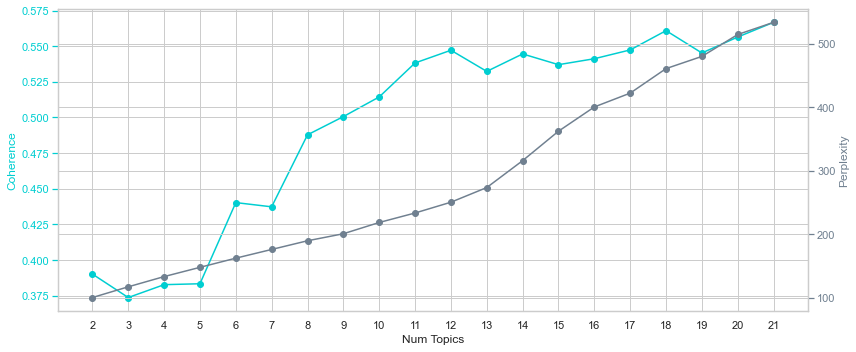

<Figure size 1152x720 with 0 Axes>

In [276]:
x = range(start, limit, step)

fig, ax1 = plt.subplots(figsize=(12,5))

# coherence
c1 = 'darkturquoise'
ax1.plot(x, coherence_vals, 'o-', color=c1)
ax1.set_xlabel('Num Topics')
ax1.set_ylabel('Coherence', color=c1); ax1.tick_params('y', colors=c1)

# perplexity
c2 = 'slategray'
ax2 = ax1.twinx()
ax2.plot(x, perplexity_vals, 'o-', color=c2)
ax2.set_ylabel('Perplexity', color=c2); ax2.tick_params('y', colors=c2)

# Vis
ax1.set_xticks(x)
fig.tight_layout()
plt.show()

# save as png
plt.savefig('metrics.png')

In [277]:
# #I will try 10 topics
total_topics = 12
lda= gensim.models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=total_topics,passes=10 )
# corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tf
# lda= models.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=total_topics)


2021-10-25 16:36:04,377 : INFO : using symmetric alpha at 0.08333333333333333
2021-10-25 16:36:04,379 : INFO : using symmetric eta at 0.08333333333333333
2021-10-25 16:36:04,380 : INFO : using serial LDA version on this node
2021-10-25 16:36:04,383 : INFO : running online (multi-pass) LDA training, 12 topics, 10 passes over the supplied corpus of 5246 documents, updating model once every 2000 documents, evaluating perplexity every 5246 documents, iterating 50x with a convergence threshold of 0.001000
2021-10-25 16:36:04,488 : INFO : PROGRESS: pass 0, at document #2000/5246
2021-10-25 16:36:05,043 : INFO : merging changes from 2000 documents into a model of 5246 documents
2021-10-25 16:36:05,045 : INFO : topic #11 (0.083): 0.017*"could" + 0.016*"help" + 0.013*"need" + 0.013*"race" + 0.012*"punjab" + 0.011*"first" + 0.010*"response" + 0.009*"do" + 0.009*"tcell" + 0.009*"supply"
2021-10-25 16:36:05,047 : INFO : topic #9 (0.083): 0.026*"trial" + 0.020*"phase" + 0.014*"test" + 0.011*"fauci"

2021-10-25 16:36:09,421 : INFO : topic #7 (0.083): 0.070*"first" + 0.050*"register" + 0.044*"president" + 0.043*"say" + 0.036*"world" + 0.035*"daughter" + 0.034*"approve" + 0.031*"vladimir" + 0.029*"break" + 0.026*"announce"
2021-10-25 16:36:09,424 : INFO : topic #4 (0.083): 0.035*"herdimmunity" + 0.031*"mrna" + 0.022*"philippine" + 0.019*"late" + 0.019*"modernatx" + 0.019*"federal" + 0.019*"punjab" + 0.018*"herd" + 0.017*"active" + 0.017*"data"
2021-10-25 16:36:09,426 : INFO : topic diff=0.541236, rho=0.465091
2021-10-25 16:36:09,589 : INFO : PROGRESS: pass 2, at document #2000/5246
2021-10-25 16:36:10,135 : INFO : merging changes from 2000 documents into a model of 5246 documents
2021-10-25 16:36:10,137 : INFO : topic #4 (0.083): 0.029*"mrna" + 0.028*"herdimmunity" + 0.026*"late" + 0.023*"modernatx" + 0.020*"coronavaccine" + 0.020*"punjab" + 0.019*"herd" + 0.019*"close" + 0.018*"reality" + 0.018*"data"
2021-10-25 16:36:10,140 : INFO : topic #2 (0.083): 0.022*"pandemic" + 0.018*"poten

2021-10-25 16:36:13,541 : INFO : topic #11 (0.083): 0.041*"become" + 0.028*"help" + 0.028*"fight" + 0.025*"ready" + 0.023*"could" + 0.021*"country" + 0.020*"another" + 0.019*"sweden" + 0.018*"do" + 0.017*"possible"
2021-10-25 16:36:13,546 : INFO : topic #3 (0.083): 0.024*"university" + 0.024*"protect" + 0.021*"would" + 0.019*"let" + 0.019*"accord" + 0.019*"child" + 0.019*"life" + 0.019*"prove" + 0.019*"ensure" + 0.018*"require"
2021-10-25 16:36:13,552 : INFO : topic diff=0.220742, rho=0.388573
2021-10-25 16:36:13,751 : INFO : PROGRESS: pass 4, at document #2000/5246
2021-10-25 16:36:14,365 : INFO : merging changes from 2000 documents into a model of 5246 documents
2021-10-25 16:36:14,368 : INFO : topic #9 (0.083): 0.052*"trial" + 0.039*"phase" + 0.026*"volunteer" + 0.023*"clinical" + 0.021*"result" + 0.020*"test" + 0.020*"global" + 0.019*"last" + 0.018*"start" + 0.017*"best"
2021-10-25 16:36:14,369 : INFO : topic #4 (0.083): 0.032*"mrna" + 0.032*"herdimmunity" + 0.028*"late" + 0.026*"c

2021-10-25 16:36:17,337 : INFO : topic #5 (0.083): 0.032*"cansino" + 0.029*"expert" + 0.027*"approval" + 0.025*"great" + 0.023*"happen" + 0.022*"live" + 0.022*"thank" + 0.021*"development" + 0.020*"meet" + 0.017*"trial"
2021-10-25 16:36:17,338 : INFO : topic #11 (0.083): 0.043*"become" + 0.031*"help" + 0.029*"fight" + 0.028*"ready" + 0.024*"could" + 0.021*"another" + 0.019*"sweden" + 0.019*"race" + 0.018*"response" + 0.018*"possible"
2021-10-25 16:36:17,339 : INFO : topic diff=0.121605, rho=0.340542
2021-10-25 16:36:17,434 : INFO : PROGRESS: pass 6, at document #2000/5246
2021-10-25 16:36:17,829 : INFO : merging changes from 2000 documents into a model of 5246 documents
2021-10-25 16:36:17,831 : INFO : topic #9 (0.083): 0.057*"trial" + 0.045*"phase" + 0.028*"volunteer" + 0.026*"clinical" + 0.025*"human" + 0.021*"test" + 0.021*"result" + 0.020*"global" + 0.018*"start" + 0.018*"last"
2021-10-25 16:36:17,833 : INFO : topic #10 (0.083): 0.033*"deal" + 0.029*"update" + 0.027*"india" + 0.024

2021-10-25 16:36:20,912 : INFO : topic #0 (0.083): 0.037*"get" + 0.031*"think" + 0.028*"know" + 0.023*"vaccinate" + 0.020*"rush" + 0.019*"soon" + 0.019*"access" + 0.018*"good" + 0.018*"people" + 0.017*"trust"
2021-10-25 16:36:20,913 : INFO : topic #6 (0.083): 0.029*"safe" + 0.028*"effective" + 0.024*"shoot" + 0.023*"business" + 0.021*"article" + 0.021*"australia" + 0.020*"today" + 0.020*"offer" + 0.019*"safety" + 0.019*"candidate"
2021-10-25 16:36:20,914 : INFO : topic diff=0.089153, rho=0.306815
2021-10-25 16:36:21,007 : INFO : PROGRESS: pass 8, at document #2000/5246
2021-10-25 16:36:21,373 : INFO : merging changes from 2000 documents into a model of 5246 documents
2021-10-25 16:36:21,375 : INFO : topic #2 (0.083): 0.025*"pandemic" + 0.022*"scientist" + 0.018*"mask" + 0.018*"virus" + 0.018*"already" + 0.017*"need" + 0.016*"make" + 0.016*"find" + 0.015*"antibody" + 0.015*"must"
2021-10-25 16:36:21,377 : INFO : topic #3 (0.083): 0.027*"look" + 0.026*"would" + 0.024*"protect" + 0.020*"p

2021-10-25 16:36:24,320 : INFO : topic #7 (0.083): 0.093*"first" + 0.052*"register" + 0.051*"say" + 0.049*"president" + 0.046*"approve" + 0.046*"world" + 0.044*"daughter" + 0.042*"announce" + 0.038*"vladimir" + 0.035*"develop"
2021-10-25 16:36:24,322 : INFO : topic #4 (0.083): 0.042*"herdimmunity" + 0.036*"mrna" + 0.027*"late" + 0.026*"coronavaccine" + 0.025*"philippine" + 0.024*"data" + 0.023*"herd" + 0.023*"modernatx" + 0.020*"close" + 0.019*"support"
2021-10-25 16:36:24,324 : INFO : topic diff=0.070536, rho=0.281461
2021-10-25 16:36:24,325 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=663, num_topics=12, decay=0.5, chunksize=2000) in 19.94s', 'datetime': '2021-10-25T16:36:24.325153', 'gensim': '4.0.1', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}


In [278]:
lda.show_topics(total_topics,10)


[(0,
  '0.037*"get" + 0.032*"think" + 0.029*"know" + 0.021*"vaccinate" + 0.021*"rush" + 0.019*"soon" + 0.019*"access" + 0.019*"good" + 0.018*"people" + 0.017*"want"'),
 (1,
  '0.042*"china" + 0.034*"patent" + 0.030*"punjab" + 0.026*"case" + 0.024*"share" + 0.023*"report" + 0.023*"launch" + 0.022*"grant" + 0.020*"talk" + 0.019*"join"'),
 (2,
  '0.027*"pandemic" + 0.024*"scientist" + 0.021*"mask" + 0.018*"virus" + 0.018*"already" + 0.016*"need" + 0.015*"find" + 0.015*"stop" + 0.015*"tell" + 0.015*"make"'),
 (3,
  '0.027*"would" + 0.027*"look" + 0.022*"protect" + 0.022*"university" + 0.021*"like" + 0.021*"let" + 0.020*"take" + 0.019*"accord" + 0.019*"child" + 0.018*"prove"'),
 (4,
  '0.042*"herdimmunity" + 0.036*"mrna" + 0.027*"late" + 0.026*"coronavaccine" + 0.025*"philippine" + 0.024*"data" + 0.023*"herd" + 0.023*"modernatx" + 0.020*"close" + 0.019*"support"'),
 (5,
  '0.031*"cansino" + 0.030*"expert" + 0.028*"approval" + 0.026*"great" + 0.024*"happen" + 0.022*"live" + 0.022*"thank" + 0

For each tweet, the LDA assigned a probability to each of the 14 topics. We assigned the topic with the highest probability to each tweet, and we grouped the tweets according to the most prevalent topics. 

In [279]:
for e, values in enumerate(lda.inference(corpus_tfidf)[0]):
#     print(df['text_vader'][e])
    result =pd.DataFrame(columns=('idx','probability'))
    
    for ee, value in enumerate(values):
#         print('\t topic %d probability% 2f' % (ee, value))
        result=result.append(pd.DataFrame({'idx':[ee],'probability':[value]}),ignore_index=True)
        
    topic_number=result['probability'].idxmax()
    df.loc[e, 'probability'] = max(result['probability'])
    df.loc[e, 'topic'] = topic_number+1


In [280]:
df.head()

,date,user_location,text,text_vader,clean_text,tokenized,No_stopwords,text2,label,probability,topic
0,2020-07-25,India,Punjab Govt Warns People Not to Click on Any URL Circulated via SMS/WhatsApp Claiming COVID-19 Relief Package of Rs… https://t.co/tOVrae0N2V,Punjab Govt Warns People Not to Click on Any URL Circulated via SMS/WhatsApp Claiming COVID- Relief Package of Rs…,punjab govt warns people not to click on any url circulated via smswhatsapp claiming covid relief package of rs…,"[punjab, govt, warns, people, click, circulated, smswhatsapp, claiming, covid, relief, package]","[punjab, govt, warns, people, click, circulated, smswhatsapp, claiming, covid, relief, package]","[punjab, govt, warn, people, click, circulate, smswhatsapp, claim, relief, package]",Positive,1.519153,2.0
1,2020-07-25,USA,"“Until the day we have a medical vaccine, food is the best vaccine against chaos.” - @WFPChief David Beasley. \n\nAm… https://t.co/pEYhGxDRPN","“Until the day we have a medical vaccine, food is the best vaccine against chaos.” - @WFPChief David Beasley. Am…",“until the day we have a medical vaccine food is the best vaccine against chaos” wfpchief david beasley am…,"[until, have, medical, vaccine, food, best, vaccine, against, chaos, wfpchief, david, beasley]","[medical, vaccine, food, best, vaccine, chaos, wfpchief, david, beasley]","[medical, food, best, chaos, wfpchief, david, beasley]",Positive,1.812487,10.0
2,2020-07-25,India,PRANIK'S Giloy Capsules gives you far-reaching benefits to fight against the infections and boost your immunity.… https://t.co/JlZXHZT1A1,PRANIK'S Giloy Capsules gives you far-reaching benefits to fight against the infections and boost your immunity.…,praniks giloy capsules gives you farreaching benefits to fight against the infections and boost your immunity…,"[praniks, giloy, capsules, gives, farreaching, benefits, fight, against, infections, boost, your, immunity]","[praniks, giloy, capsules, gives, farreaching, benefits, fight, infections, boost, immunity]","[praniks, giloy, capsule, give, farreaching, benefit, fight, infection, boost]",Positive,1.145822,12.0
3,2020-07-25,USA,Check out my latest article: Three Supply Chain Risks That Could Thwart A Successful COVID-19 Vaccine… https://t.co/3Tdkknwns7,Check out my latest article: Three Supply Chain Risks That Could Thwart A Successful COVID- Vaccine…,check out my latest article three supply chain risks that could thwart a successful covid vaccine…,"[check, latest, article, three, supply, chain, risks, that, could, thwart, successful, covid, vaccine]","[check, latest, article, three, supply, chain, risks, could, thwart, successful, covid, vaccine]","[check, late, article, three, supply, chain, risk, could, thwart, successful]",Positive,1.347903,12.0
4,2020-07-25,UK,"Even when we have a #COVID19 vaccine, are face coverings here to stay? It feels like a massive shift towards more a… https://t.co/K4K8BqVTZT","Even when we have a # vaccine, are face coverings here to stay? It feels like a massive shift towards more a…",even when we have a vaccine are face coverings here to stay it feels like a massive shift towards more a…,"[even, when, have, vaccine, face, coverings, here, stay, feels, like, massive, shift, towards, more]","[even, vaccine, face, coverings, stay, feels, like, massive, shift, towards]","[even, face, cover, stay, feel, like, massive, shift, towards]",Positive,1.240523,1.0


In [281]:
topic1=df.loc[df['topic']==1]
topic2=df.loc[df['topic']==2]
topic3=df.loc[df['topic']==3]
topic4=df.loc[df['topic']==4]
topic5=df.loc[df['topic']==5]
topic6=df.loc[df['topic']==6]
topic7=df.loc[df['topic']==7]
topic8=df.loc[df['topic']==8]
topic9=df.loc[df['topic']==9]
topic10=df.loc[df['topic']==10]
topic11=df.loc[df['topic']==11]
topic12=df.loc[df['topic']==12]
# topic13=df.loc[df['topic']==13]
# topic14=df.loc[df['topic']==14]




In [282]:
topic12.sort_values(by='probability', ascending=False)['text_vader'].head(40).unique()


array(['Drugmakers are racing behind the scenes to build the supply chains needed to deliver a # vaccine to billions… ',
       "China could be among the countries that first produces a successful vaccine for #. Here's what that might me… ",
       '"The Uganda Virus Research Institute is partnering with Imperial College London to start the first Covid- vaccine… ',
       "China could be one of the first countries to produce a successful # vaccine.According to RAND's… ",
       'China Xinhua News@XHNewsWHO chief Tedros has warned against "vaccine nationalism" in order to guarantee equitabl… ',
       'Serum Institute Director indicates that #India will most probably have covid vaccine ready by December . vacc… ',
       '"Why the race for a #coronavirus vaccine must include developing countries." Dr. @naorbz of @JohnsHopkinsSPH\'s… ',
       'Health Watch | Imperial College of London # vaccine to be tested in Uganda by December .… ',
       'This is gonna make heads explode: # vaccines

In [283]:
topic1_post=topic1.loc[topic1['probability']== max(topic1['probability']),['topic','text_vader','label','date','probability']]
topic2_post=topic2.loc[topic2['probability']== max(topic2['probability']),['topic','text_vader','label','date','probability']]
topic3_post=topic3.loc[topic3['probability']== max(topic3['probability']),['topic','text_vader','label','date','probability']]
topic4_post=topic4.loc[topic4['probability']== max(topic4['probability']),['topic','text_vader','label','date','probability']]
topic5_post=topic5.loc[topic5['probability']== max(topic5['probability']),['topic','text_vader','label','date','probability']]
topic6_post=topic6.loc[topic6['probability']== max(topic6['probability']),['topic','text_vader','label','date','probability']]
topic7_post=topic7.loc[topic7['probability']== max(topic7['probability']),['topic','text_vader','label','date','probability']]
topic8_post=topic8.loc[topic8['probability']== max(topic8['probability']),['topic','text_vader','label','date','probability']]
topic9_post=topic9.loc[topic9['probability']== max(topic9['probability']),['topic','text_vader','label','date','probability']]
topic10_post=topic10.loc[topic10['probability']== max(topic10['probability']),['topic','text_vader','label','date','probability']]
topic11_post=topic11.loc[topic11['probability']== max(topic11['probability']),['topic','text_vader','label','date','probability']]
topic12_post=topic12.loc[topic12['probability']== max(topic12['probability']),['topic','text_vader','label','date','probability']]
# topic13_post=topic13.loc[topic13['probability']== max(topic13['probability']),['topic','text_vader','label','date','probability']]
# topic14_post=topic14.loc[topic14['probability']== max(topic14['probability']),['topic','text_vader','label','date','probability']]



In [284]:
df_date=topic12[['date','label','text_vader']]
df_date=df_date.groupby(['date','label'])
df_date=df_date.count()
df_date.head()


df_date=df_date.reset_index()
df_date.columns=['date','label','counts']


# pip install plotly

px.line(df_date,width=700, height=500,x='date',y='counts',color='label',
       title='Daily Tweet Sentimental Analysis')


In [285]:
frames = [topic1_post, topic2_post,topic3_post,topic4_post,topic5_post,topic6_post,topic7_post,topic8_post,topic9_post,topic10_post,topic11_post,topic12_post]

topic_result = pd.concat(frames)
topic_result.drop_duplicates(subset=['text_vader'],inplace=True)
topic_result

,topic,text_vader,label,date,probability
2366,1.0,"I was not ready to hear that % of Americans would choose NOT to receive a free, FDA approved # vaccine. E…",Negative,2020-08-10,2.701767
1727,2.0,#Punjab reported new # cases and deaths in the last hours. Total number of cases in the state now…,Positive,2020-08-06,3.013293
3584,3.0,Either they created a virus and already had the vaccines...or they knew that # was coming years ago. It take…,Positive,2020-08-13,2.718140
4910,4.0,What would it look like if #vaccine injured children’s families got the same treatment and attention as the people at risk for #,Negative,2020-08-22,2.879047
518,5.0,"Our @Medidata brand is collaborating with @moderna_tx to support clinical trials of mRNA-, Moderna’s #…",Positive,2020-07-27,2.825618
1939,6.0,"States have authority to fine or jail people who refuse coronavirus vaccine, attorney says“Could the government r…",Neutral,2020-08-08,2.656475
4521,7.0,"Sounds like the need for a booster shot, once a vaccine is made, for # might be necessary based on this info…",Positive,2020-08-18,2.857538
2528,8.0,#Russian President #Vladimir #Putin says Russia’s Health Ministry has approved world’s FIRST # #vaccine – hi…,Positive,2020-08-11,2.830974
4828,9.0,"Russia’s plan to roll-out its “Sputnik-V” # vaccine even before full trials, how well it works is prompting…",Positive,2020-08-22,2.659210
1974,10.0,"# new cases of # reported in Punjab in the last hours. State tally rises to , including ,…",Neutral,2020-08-08,3.049155


In [286]:
# data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}

In [287]:
# df_lda = pd.DataFrame(data_lda)
# df_lda = df_lda.fillna(0).T
# print(df_lda.shape)

In [288]:
# df_lda


In [289]:
# g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
# plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
# plt.show()
# #plt.setp(ax_heatmap.get_yticklabels(), rotation=0)  # For y axis

In [290]:
# import pyLDAvis.gensim
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_tfidf, dictionary, mds='tsne')
panel
# panel.display()
# pyLDAvis.show(panel,open_browser=True)


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
7      5.310529    171.049652  1       1        11.050303
2      136.304657  23.800941   2       1        10.477268
9      101.190552 -84.985191   3       1        9.921401 
1     -106.824867  148.841736  4       1        8.471110 
0     -44.365761   78.632721   5       1        8.330568 
10     43.884090   73.474022   6       1        7.826748 
3      114.093971  135.933029  7       1        7.803351 
11    -119.727142 -72.077179   8       1        7.397777 
6     -49.518208  -9.617325    9       1        7.395309 
8     -141.938736  40.055210   10      1        7.316207 
5      38.731544  -14.776019   11      1        7.259951 
4     -10.944340  -107.193344  12      1        6.750006 , topic_info=          Term        Freq       Total Category  logprob  loglift
36   first      134.000000  134.000000  Default  30.0000  30.0000
637  register   59.000000   59.000000   Default  29.0000  29.0000
565  president  56.000000   56.000000   Default  28.0000  28.0000
655  daughter   50.000000   50.000000   Default  27.0000  27.0000
442  approve    60.000000   60.000000   Default  26.0000  26.0000
..       ...          ...         ...       ...      ...      ...
426  among      8.660153    12.166472   Topic12 -4.3867   2.3557 
127  herd       16.146271   53.921198   Topic12 -3.7638   1.4898 
3    punjab     12.214324   46.847212   Topic12 -4.0429   1.3513 
124  case       9.158615    37.713337   Topic12 -4.3308   1.2803 
329  update     8.169737    40.723259   Topic12 -4.4450   1.0893 

[579 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
238   2      0.086016  access 
238   5      0.688127  access 
238   6      0.215040  access 
496   7      0.941546  accord 
114   12     0.869142  achieve
...  ..           ...     ... 
118   7      0.336041  year   
118   9      0.077548  year   
118   12     0.077548  year   
270   6      0.886604  youtube
510   4      0.827399  zero   

[1016 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 3, 10, 2, 1, 11, 4, 12, 7, 9, 6, 5])

In [291]:
# perplexity = []
# coherence = []

# for t in range(1, 40):
#     lda= models.LdaModel(corpus, id2word=dictionary, num_topics=t)
#     corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tf
#     cm = CoherenceModel(model=lda,texts=texts,dictionary=dictionary, coherence='c_v')

#     score = cm.get_coherence()
#     tup = t, score
#     coherence.append(tup)
    
#     p_score = lda.log_perplexity(corpus_tfidf)
#     tup_p = t, p_score
#     perplexity.append(tup_p)

# perplexity = pd.DataFrame(perplexity, columns=['topic', 'score'])
# coherence = pd.DataFrame(coherence, columns=['topic', 'score'])


In [292]:
# p = pd.Series(perplexity.score.values, index=perplexity.topic.values)
# _ = p.plot()



Inflection point

In [293]:
# c = pd.Series(coherence.score.values, index=coherence.topic.values)
# _ = c.plot()

The plot in shows that coherence scores increase with the number of topics.
There is a moderate increase in coherence score for topics between 10 and 20. 
Though coherence scores are high for the number of topics from 20 onwards, it makes the model to underfit or overfit the data.
LDA model in Gensim shows the satisfactory value for topic count 10. 

In [294]:
# # import gensim
# # from gensim import models
# # import pyLDAvis.gensim

# def lda_vis():
#     dictionary = gensim.corpora.Dictionary.load('tweets.dict')
#     corpus = gensim.corpora.MmCorpus('tweets1.mm')
#     lda = models.ldamodel.LdaModel.load('lda.model')
#     vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
#     pyLDAvis.save_html(vis, 'lda.html')
#     return 0
 
# if __name__ == '__main__':
#     lda_vis()


In [295]:
# # df=df.loc[df['user_location'].str.contains('uk',case=False,na=False)]
# pd.set_option('display.max_colwidth', -1)

# df1=df.loc[df['text'].str.contains('fatigue',case=False)]
# df1.text
# # toryscandals
# # herdimmunity scandal
# # lockdownfatigue scandal


In [296]:
# country_df=df.loc[df.user_location=="Canada",'text']
# texts=[]
# texts=country_df.to_list()

# dictionary = corpora.Dictionary(texts)
# dictionary.save(os.path.join(TEMP_FOLDER, 'country_tweets.dict'))

# dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=75000)
# dictionary.compactify()

# corpus = [dictionary.doc2bow(text) for text in texts]
# corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'country_tweets.mm'), corpus) # store to disk, for later use


# tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model
# corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors
    

# total_topics = 5
# lda= models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
# corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tf
# # lda.show_topics(total_topics,5)

# # vis = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')

# #     dictionary = gensim.corpora.Dictionary.load('tweets.dict')
# #     corpus = gensim.corpora.MmCorpus('tweets1.mm')
# #     lda = models.ldamodel.LdaModel.load('lda.model')
# #     vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
# # pyLDAvis.save_html(vis, 'lda.html')
# #     return 0
 
# # if __name__ == '__main__':
# #     lda_vis()


In [297]:
# import pyLDAvis.gensim

# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')


In [298]:
# @interact
# def country_topic(Location=Location_list):   
#     lda_vis(df, Location)

    

In [299]:
# # import gensim
# # from gensim import models
# # import pyLDAvis.gensim

# # def lda_vis(df,country):
#      country_df=df.loc[df.user_location=="Canada",'text']
#     texts=[]
#     texts = country_df['text'].to_list()
#     dictionary = corpora.Dictionary(texts)
# #     dictionary.save(os.path.join(TEMP_FOLDER, 'tweets.dict'))
#     dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=75000)
#     dictionary.compactify()

#     corpus = [dictionary.doc2bow(text) for text in texts]
# #     corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'tweets.mm'), corpus) # store to disk, for later use
    
    
#     tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model
#     corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors
    

#     total_topics = 10
#     lda= models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
#     corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tf
#     lda.show_topics(total_topics,5)

#     vis = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')

# #     dictionary = gensim.corpora.Dictionary.load('tweets.dict')
# #     corpus = gensim.corpora.MmCorpus('tweets1.mm')
# #     lda = models.ldamodel.LdaModel.load('lda.model')
# #     vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
#     pyLDAvis.save_html(vis, 'lda.html')
# #     return 0
 
# # if __name__ == '__main__':
# #     lda_vis()
